# 1. 라이브러리 불러오기

---

In [16]:
import platform

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1000)

import scipy.stats as stats

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings(action = 'ignore')

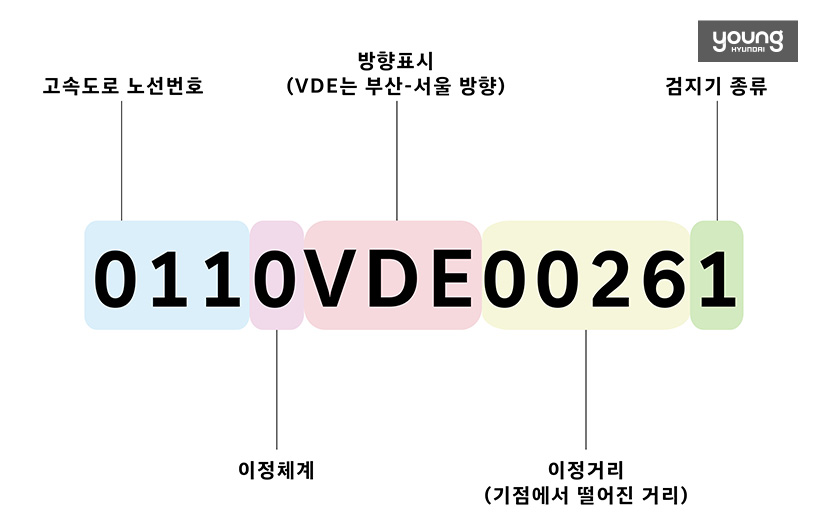

# 2. 데이터 불러오기

---

## 2.1 경부선 VDS 설치 정보 data

In [8]:
data1 = pd.read_csv('./data/경부선 VDS 설치정보(그룹).csv', encoding = 'CP949')

# 'Unnamed: 0' Column 제거
data1 = data1.drop(['Unnamed: 0'], axis = 1)
print('경부선 VDS 설치정보 행과 열의 개수 :', data1.shape, '\n')

# 데이터 일부 확인
display(data1.head(3))

경부선 VDS 설치정보 행과 열의 개수 : (833, 18) 



,VDS_ID,GRS80_X좌표,GRS80_Y좌표,지점이정,VDS존_시작이정,VDS존_종료이정,노선번호,도로명,VDS존_유형구분코드,VDS존_유형구분명,기점종점방향구분코드,VDS존 길이,도로등급구분코드,도로등급구분명,콘존ID,WGS84_X좌표,WGS84_Y좌표,group
0,0010VDE00100,391265.1686,297630.0182,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1
1,0010VDE00200,391642.5985,298552.1566,2.40km,2.02km,2.85km,10,경부선,1,FTMS 본선 VDS,E,830.00m,101,고속국도,0010CZE011,129.105973,35.265211,1
2,0010VDE00300,391873.6131,299421.8265,3.30km,2.85km,4.01km,10,경부선,1,FTMS 본선 VDS,E,1160.00m,101,고속국도,0010CZE011,129.108714,35.273000,1


In [9]:
print('삭제 전 경부선 VDS 설치정보 행과 열의 개수 :', data1.shape, '\n')

# GRS80 좌표를 WGS 좌표로 변환해주었으므로 삭제해주자.
data1 = data1.drop(['GRS80_X좌표', 'GRS80_Y좌표'], axis = 1)
print('삭제 후 경부선 VDS 설치정보 행과 열의 개수 :', data1.shape)

삭제 전 경부선 VDS 설치정보 행과 열의 개수 : (833, 18) 

삭제 후 경부선 VDS 설치정보 행과 열의 개수 : (833, 16)


In [10]:
# 경부선 총 VDS의 개수 확인
len(data1['VDS_ID'].unique())

833

In [12]:
# 'group' 변수의 고유값 확인
print(np.sort(data1['group'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]


- 총 **833** 개의 VDS 기기가 존재하며, 833개의 VDS를 분기점을 기준으로 하여 35개의 그룹으로 나눠주었다.

## 2.2 2주간의 VDS 지점 교통량 data

In [13]:
# 총 1016064의 관측치와 15개의 변수로 이루어져 있다.
data2 = pd.read_csv('data/경부선 8월 데이터(2주).csv')
print('2주간 VDS 지점 교통량 행과 열의 개수 :', data2.shape)

2주간 VDS 지점 교통량 행과 열의 개수 : (1016064, 15)


In [14]:
print('2주간 VDS 지점 교통량 VDS 개수 :', len(set(data2['VDS_ID'])))

2주간 VDS 지점 교통량 VDS 개수 : 756


In [15]:
# 경부선 VDS 설치 정보 data에서는 VDS의 개수가 총 833개인데, 2주간 VDS 지점 교통량 data에서는 VDS의 개수가 총 756개이다.
data1_vds_list = data1['VDS_ID']
data2_vds_list = [vds for vds in set(data2['VDS_ID'])]

불포함VDS = []

for item in data1_vds_list:
    if item not in data2_vds_list:
        불포함VDS.append(item)

print('불포함 VDS 개수 :', len(불포함VDS), '\n')
print(불포함VDS)

불포함 VDS 개수 : 77 

['0010VDE13650', '0010VDE13651', '0010VDE21210', '0010VDE21310', '0010VDE21510', '0010VDE21610', '0010VDE22710', '0010VDE22720', '0010VDE23010', '0010VDE23020', '0010VDE23610', '0010VDE23620', '0010VDE25310', '0010VDE25320', '0010VDE25610', '0010VDE25810', '0010VDE26310', '0010VDE26311', '0010VDE27310', '0010VDE27320', '0010VDE27610', '0010VDE27710', '0010VDE27720', '0010VDE29010', '0010VDE29020', '0010VDE29310', '0010VDE29320', '0010VDE29610', '0010VDE29611', '0010VDE29620', '0010VDE30010', '0010VDE30110', '0010VDE30910', '0010VDE31010', '0010VDE31210', '0010VDE31220', '0010VDS13650', '0010VDS13651', '0010VDS21210', '0010VDS21310', '0010VDS21610', '0010VDS21620', '0010VDS22710', '0010VDS22720', '0010VDS23010', '0010VDS23020', '0010VDS23610', '0010VDS23620', '0010VDS25310', '0010VDS25320', '0010VDS25610', '0010VDS25810', '0010VDS26320', '0010VDS26330', '0010VDS27310', '0010VDS27320', '0010VDS27610', '0010VDS27620', '0010VDS27630', '0010VDS27710', '0010VDS27720', '0010

# 3. 데이터 병합

---

In [18]:
total = pd.merge(data1, data2, on = 'VDS_ID')

print('통합 데이터 행과 열의 개수 :', total.shape, '\n')
print('통합 데이터 VDS_ID의 개수 :', len(set(total['VDS_ID'])))

# 데이터 일부 확인
display(total.head(3))

통합 데이터 행과 열의 개수 : (1016064, 30) 

통합 데이터 VDS_ID의 개수 : 756


,VDS_ID,지점이정_x,VDS존_시작이정,VDS존_종료이정,노선번호_x,도로명_x,VDS존_유형구분코드,VDS존_유형구분명,기점종점방향구분코드,VDS존 길이,도로등급구분코드,도로등급구분명,콘존ID,WGS84_X좌표,WGS84_Y좌표,group,기준시간,기준시,기준일,Month,Day,요일명,지점이정_y,노드명,도로이정,노선번호_y,도로명_y,교통량,평균속도,holiday
0,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,0,0,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,74,86.42,0
1,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,1,145,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,57,79.39,0
2,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,3,315,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,45,81.48,0


- '지점이정_x', 'VDS존_시작이정', 'VDS존_시작이정', 'VDS존 길이' 4개의 변수에 단위가 포함되어 있으며, 서로 단위가 일치하지 않음을 확인할 수 있다.

- 단위를 **Km**로 맞춰주고, 숫자형으로 변환시켜주도록 하자.

In [19]:
print('변환 전 통합데이터 행과 열의 개수 :', total.shape, '\n')

total['지점이정(km)'] = total['지점이정_x'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존 시작이정(km)'] = total['VDS존_시작이정'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존 종료이정(km)'] = total['VDS존_종료이정'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존 길이(km)'] = total['VDS존 길이'].replace('[a-z]', '', regex = True).astype(float) * 0.001

print('변환 후 통합데이터 행과 열의 개수 :', total.shape)

변환 전 통합데이터 행과 열의 개수 : (1016064, 30) 

변환 후 통합데이터 행과 열의 개수 : (1016064, 34)


In [20]:
# 기준시 변수를 살펴보니 맨 앞은 시간을 의미하고, 15분 간격으로 수집이 되었음을 볼 수 있다.
total['기준시'] = total['기준시'].map({
    0 : 0, 15 : 15, 30 : 30, 45 : 45,
    100 : 0, 115 : 15, 130 : 30, 145 : 45,
    200 : 0, 215 : 15, 230 : 30, 245 : 45,
    300 : 0, 315 : 15, 330 : 30, 345 : 45,
    400 : 0, 415 : 15, 430 : 30, 445 : 45,
    500 : 0, 515 : 15, 530 : 30, 545 : 45,
    600 : 0, 615 : 15, 630 : 30, 645 : 45,
    700 : 0, 715 : 15, 730 : 30, 745 : 45,
    800 : 0, 815 : 15, 830 : 30, 845 : 45,
    900 : 0, 915 : 15, 930 : 30, 945 : 45,
    1000 : 0, 1015 : 15, 1030 : 30, 1045 : 45,
    1100 : 0, 1115 : 15, 1130 : 30, 1145 : 45,
    1200 : 0, 1215 : 15, 1230 : 30, 1245 : 45,
    1300 : 0, 1315 : 15, 1330 : 30, 1345 : 45,
    1400 : 0, 1415 : 15, 1430 : 30, 1445 : 45,
    1500 : 0, 1515 : 15, 1530 : 30, 1545 : 45,
    1600 : 0, 1615 : 15, 1630 : 30, 1645 : 45,
    1700 : 0, 1715 : 15, 1730 : 30, 1745 : 45,
    1800 : 0, 1815 : 15, 1830 : 30, 1845 : 45,
    1900 : 0, 1915 : 15, 1930 : 30, 1945 : 45,
    2000 : 0, 2015 : 15, 2030 : 30, 2045 : 45,
    2100 : 0, 2115 : 15, 2130 : 30, 2145 : 45,
    2200 : 0, 2215 : 15, 2230 : 30, 2245 : 45,
    2300 : 0, 2315 : 15, 2330 : 30, 2345 : 45,
})

In [21]:
print('지점이정_x와 지점이정_y의 서로 다른값 개수 :', len(total[total['지점이정(km)'] != total['지점이정_y']]), '\n')
print('노선번호_x와 노선번호_y의 서로 다른값 개수 :', len(total[total['노선번호_x'] != total['노선번호_y']]))

지점이정_x와 지점이정_y의 서로 다른값 개수 : 0 

노선번호_x와 노선번호_y의 서로 다른값 개수 : 0


- '지점이정_x'와 '지점이정_y', '노선번호_x'와 '노선번호_y' 같은 값을 가지고 있음을 보였으므로 하나의 변수만 남겨두고 필요없는 변수를 삭제

In [22]:
print('삭제 전 통합데이터 행과 열의 개수 :', total.shape, '\n')

# 변수 이름을 변경
total.rename(columns = {'노선번호_x' : '노선번호', '도로명_x' : '도로명'}, inplace = True)

# 변수삭제
total = total.drop(['지점이정_x', '지점이정_y', '노선번호_y', 'VDS존_시작이정', 'VDS존_종료이정', '도로명_y', 'VDS존 길이'], axis = 1)

print('삭제 후 통합데이터 행과 열의 개수 :', total.shape)

삭제 전 통합데이터 행과 열의 개수 : (1016064, 34) 

삭제 후 통합데이터 행과 열의 개수 : (1016064, 27)


# 4. Error & Outlier Data 처리

---

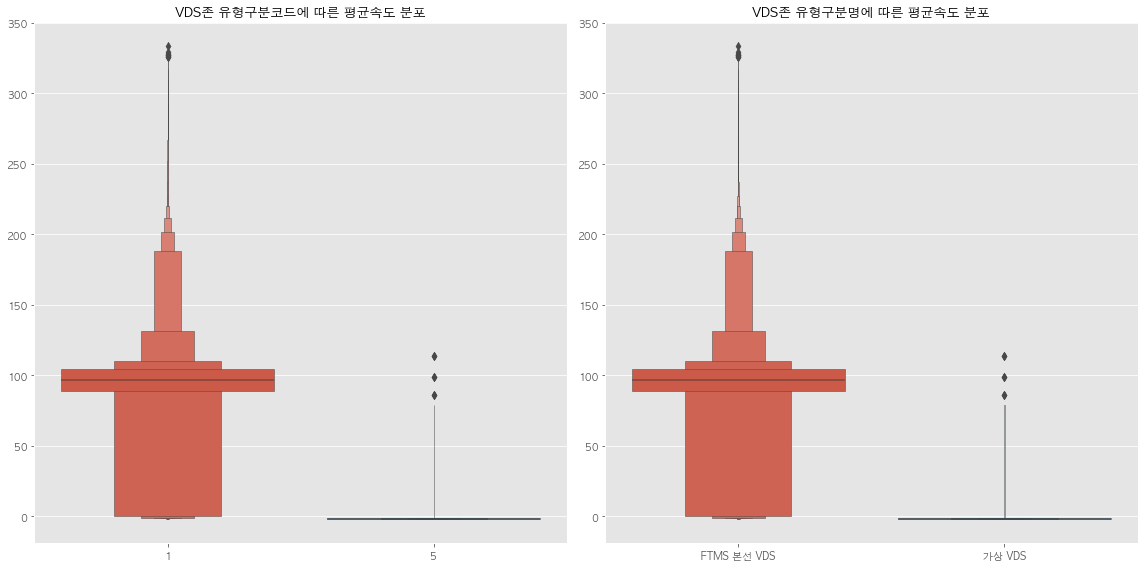

In [25]:
# VDS존_유형구분코드, VDS존_유형구분명 변수 살펴보기
fig, axes = plt.subplots(ncols = 2, figsize = (16, 8))

sns.boxenplot(x = 'VDS존_유형구분코드', y = '평균속도', data = total, ax = axes[0])
axes[0].set_title('VDS존 유형구분코드에 따른 평균속도 분포', fontsize = 13)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.boxenplot(x = 'VDS존_유형구분명', y = '평균속도', data = total, ax = axes[1])
axes[1].set_title('VDS존 유형구분명에 따른 평균속도 분포', fontsize = 13)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

fig.tight_layout()

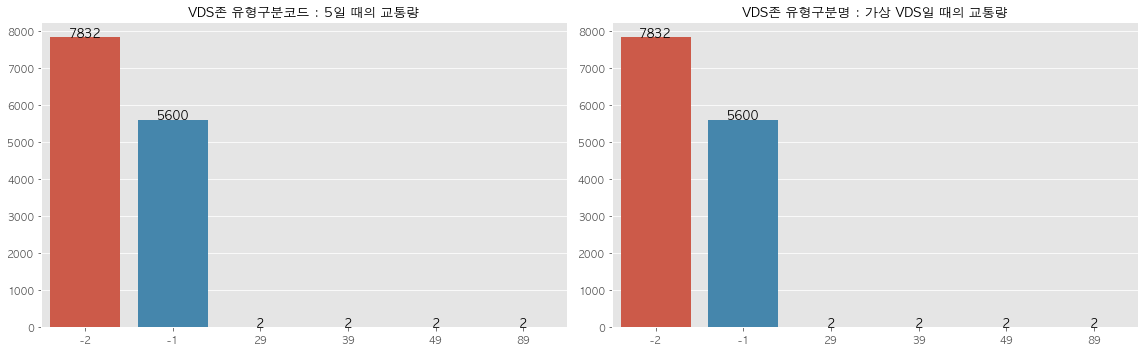

In [27]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

plot_data = pd.DataFrame(total[total['VDS존_유형구분코드'] == 5]['교통량'].value_counts())
sns.barplot(x = plot_data.index, y = '교통량', data = plot_data, ax = axes[0])
axes[0].set_title('VDS존 유형구분코드 : 5일 때의 교통량', fontsize = 13)
axes[0].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[0].text(index, value, value, ha = 'center', fontsize = 12)

plot_data = pd.DataFrame(total[total['VDS존_유형구분명'] == '가상 VDS']['교통량'].value_counts())
sns.barplot(x = plot_data.index, y = '교통량', data = plot_data, ax = axes[1])
axes[1].set_title('VDS존 유형구분명 : 가상 VDS일 때의 교통량', fontsize = 13)
axes[1].set_ylabel('')

for index, [value] in enumerate(plot_data.values):
    axes[1].text(index, value, value, ha = 'center', fontsize = 12)
    
fig.tight_layout()

- VDS존_유형구분코드 : 1과 5의 값을 가진다.

- VDS존_유형구분명 : FTMS 본선 VDS와 가상 VDS 값을 가진다.

- 'VDS존_유형구분코드'의 값이 5이고 'VDS존_유형구분명'이 가상 VDS 값을 가질 때, 평균속도가 낮으며, 교통량이 대부분 오류값을 가지고 있다.

- 따라서 해당 값을 가지는 관측치들을 삭제해주도록 한다.

In [28]:
# 오류값이 있음을 확인했으므로, 값을 제거하고 데이터를 살펴보자.
print('제외 전 데이터의 개수 :', len(total))
print('제외 전 VDS_ID의 개수 :', len(set(total['VDS_ID'])), '\n')

total = total[(total['VDS존_유형구분코드'] != 5) & (total['VDS존_유형구분명'] != '가상 VDS')]
print('제외 후 데이터의 개수 :', len(total))
print('제외 후 VDS_ID의 개수 :', len(set(total['VDS_ID'])))

제외 전 데이터의 개수 : 1016064
제외 전 VDS_ID의 개수 : 756 

제외 후 데이터의 개수 : 1002624
제외 후 VDS_ID의 개수 : 746


- 10개의 VDS 장치 손실이 일어났음을 볼 수 있다.

- 유일한 값을 가지는변수 : **'도로명', '노선번호', '도로등급구분코드', '도로등급구분명', 'VDS존_우형구분코드', 'VDS존_유형구분명'**
    

- 현재 변수가 총 27개 존재하므로, 분석에 사용할 변수만 추출해 오류 혹은 이상치를 처리해주도록 하자.

In [29]:
# 분석에 사용할 변수만 저장
final = total[['VDS_ID', '기점종점방향구분코드', 'VDS존 길이(km)', '지점이정(km)', '기준시간', '기준시', '요일명', '노드명', 'Month', 'Day', '교통량', '평균속도', 'holiday', 'group']]

# 데이터 일부 확인
display(final.head())

,VDS_ID,기점종점방향구분코드,VDS존 길이(km),지점이정(km),기준시간,기준시,요일명,노드명,Month,Day,교통량,평균속도,holiday,group
0,0010VDE00100,E,1.82,1.4,0,0,수요일,구서IC,8,26,74,86.42,0,1
1,0010VDE00100,E,1.82,1.4,1,45,수요일,구서IC,8,26,57,79.39,0,1
2,0010VDE00100,E,1.82,1.4,3,15,수요일,구서IC,8,26,45,81.48,0,1
3,0010VDE00100,E,1.82,1.4,0,15,수요일,구서IC,8,26,66,88.70,0,1
4,0010VDE00100,E,1.82,1.4,2,0,수요일,구서IC,8,26,36,81.66,0,1


In [30]:
# 데이터의 요약통계량 확인
display(final.describe())

,VDS존 길이(km),지점이정(km),기준시간,기준시,Month,Day,교통량,평균속도,holiday,group
count,1.002624e+06,1.002624e+06,1.002624e+06,1.002624e+06,1002624.0,1.002624e+06,1.002624e+06,1.002624e+06,1.002624e+06,1.002624e+06
mean,1.110013e+00,1.984542e+02,1.150000e+01,2.250000e+01,8.0,1.950000e+01,3.860307e+02,9.050448e+01,3.571429e-01,1.801743e+01
std,3.942261e-01,1.185889e+02,6.922190e+00,1.677052e+01,0.0,4.031131e+00,3.809579e+02,4.261300e+01,4.791577e-01,1.169627e+01
min,3.000000e-01,1.400000e+00,0.000000e+00,0.000000e+00,8.0,1.300000e+01,-2.000000e+00,-2.000000e+00,0.000000e+00,1.000000e+00
25%,9.300000e-01,9.850000e+01,5.750000e+00,1.125000e+01,8.0,1.600000e+01,8.400000e+01,8.876000e+01,0.000000e+00,7.000000e+00
50%,1.000000e+00,1.944000e+02,1.150000e+01,2.250000e+01,8.0,1.950000e+01,2.660000e+02,9.700000e+01,0.000000e+00,1.750000e+01
75%,1.200000e+00,2.941000e+02,1.725000e+01,3.375000e+01,8.0,2.300000e+01,5.780000e+02,1.044200e+02,1.000000e+00,2.900000e+01
max,4.320000e+00,4.153000e+02,2.300000e+01,4.500000e+01,8.0,2.600000e+01,2.294000e+03,3.335100e+02,1.000000e+00,3.500000e+01


- 평균속도 변수의 요약통계량을 보게 되면, 최소값이 **-2** 이며, 최대값은 약 330의 값을 가진다.

- 교통량 변수도 보게 되면, 최소값이 -2로 음수의 값을 가지고 있다.

- 확인 결과 평균속도가 음수로 측정된 VDS는 기기 오류임을 알 수 있었고, 따라서 해당 VDS로 측정된 관측치는 제거해주는 것이 좋을것으로 판단된다.

- (담당자) VDS 장치에서 측정한 평균속도가 음수의 값을 가지면, 해당 VDS 장치 자체의 오류라고 한다.

- 또한 평균속도가 높은 값을 가지면, VDS 장치 자체의 문제가 아닌 그 당시 일시적인 센서 오류라고 한다.

In [31]:
# 평균속도의 값이 음수를 나타내는 VDS 장치를 살펴보자.
장치오류data = final[final['평균속도'] < 0]
장치오류VDS_list = 장치오류data['VDS_ID'].unique()

print('장치오류 VDS의 개수 :', len(장치오류VDS_list))
print('장치오류 VDS의 비율 :', str(round(len(장치오류VDS_list) / len(final['VDS_ID'].unique()), 3) * 100) + '%', '\n')

print('장치오류 데이터의 개수 :', len(장치오류data))
print('장치오류 데이터의 비율 :', str(round(len(장치오류data) / len(final), 3) * 100) + '%')

장치오류 VDS의 개수 : 177
장치오류 VDS의 비율 : 23.7% 

장치오류 데이터의 개수 : 105461
장치오류 데이터의 비율 : 10.5%


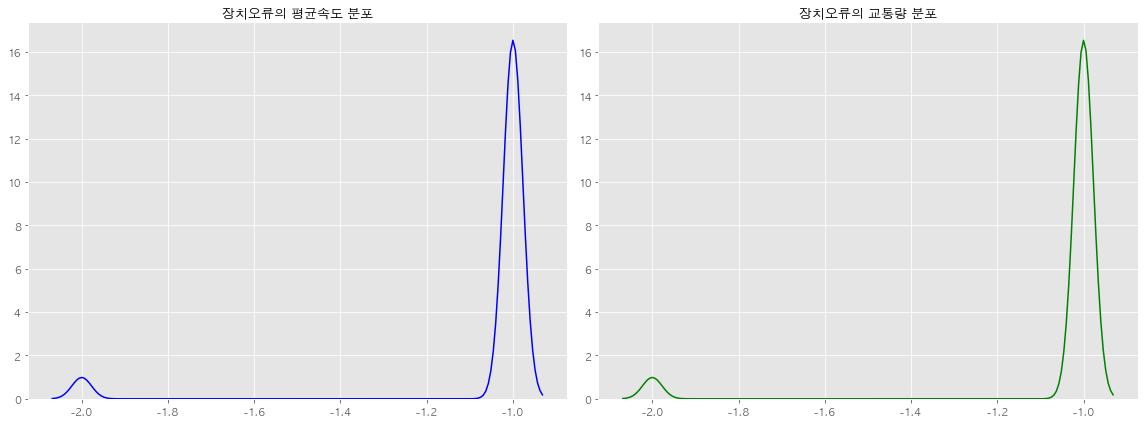

In [34]:
# 장치오류가 일어났던 VDS의 평균속도와 교통량 시각화
fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

sns.distplot(장치오류data['평균속도'], color = 'b', hist = False, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('장치오류의 평균속도 분포', fontsize = 13)

sns.distplot(장치오류data['교통량'], color = 'g', hist = False, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('장치오류의 교통량 분포', fontsize = 13)

fig.tight_layout()

- 평균속도가 음수의 값을 가지는 관측치는 교통량 또한 모두 음수의 값을 가지고 있다.


- 그렇다면, 해당 VDS로 측정된 관측치가 제대로 측정된 것이 있는지 확인해보자.

In [33]:
# 장치오류가 일어났던 VDS에서 평균속도가 0이상의 값을 가지는 데이터 추출
확인data = final[(final['VDS_ID'].isin(장치오류VDS_list)) & (final['평균속도'] >= 0)]

print('VDS의 개수 :', len(확인data['VDS_ID'].unique()), '\n')
print('데이터의 개수 :', len(확인data), '\n')
print('데이터의 비율 :', str(round(len(확인data) / len(final), 2) * 100) + '%')

VDS의 개수 : 119 

데이터의 개수 : 132427 

데이터의 비율 : 13.0%


- 장치오류가 발생했던 VDS의 개수는 **177**개 였으며, 그 중 오류가 계속 일어난 장치는 58개 이다.


- 장치오류가 발생했던 VDS가 제대로 측정한 관측치는 132,427개 임을 볼 수 있다.


- 전체 데이터에서 약 **13%** 정도를 차지하기 때문에, 한 번 오류가 발생했다고 해서 해당 VDS로 측정된 관측치를 삭제하는것은 좋지 못하다고 판단된다.

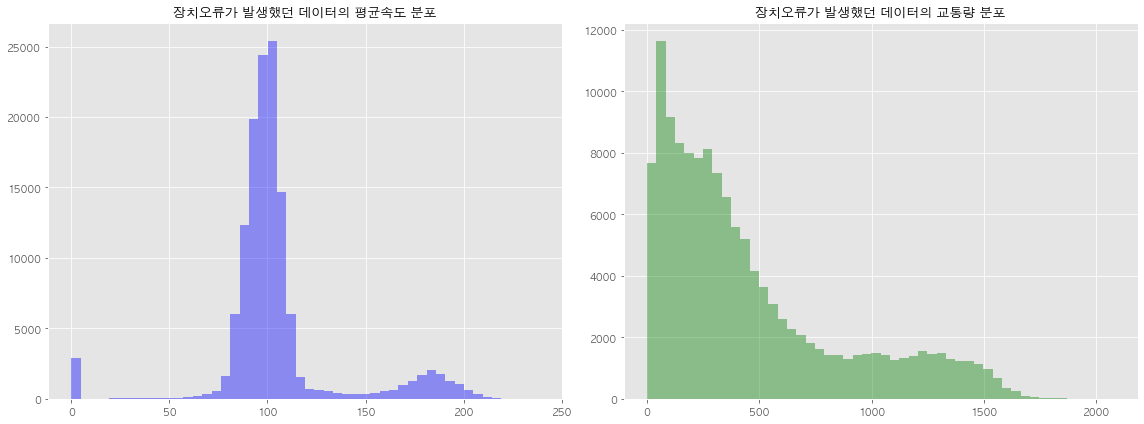

In [35]:
# 시각화를 통해 살펴보자.
fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

sns.distplot(확인data['평균속도'], color = 'b', kde = False, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_title('장치오류가 발생했던 데이터의 평균속도 분포', fontsize = 13)

sns.distplot(확인data['교통량'], color = 'g', kde = False, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_title('장치오류가 발생했던 데이터의 교통량 분포', fontsize = 13)

fig.tight_layout()

- 위의 결과들을 종합하여, 해당 VDS로 측정된 관측치들을 모두 삭제하지 말고 **평균속도가 음수로 기록된 관측치를** 삭제해주도록 하자.

In [36]:
print('장치오류 데이터 제거 전 VDS의 개수 :', len(final['VDS_ID'].unique()))
print('장치오류 데이터 제거 전 데이터의 개수 :', len(final), '\n')

# 평균속도 음수인 관측치 삭제
final = final[final['평균속도'] >= 0]
print('장치오류 데이터 제거 후 VDS의 개수 :', len(final['VDS_ID'].unique()))
print('장치오류 데이터 제거 후 데이터의 개수 :', len(final))

장치오류 데이터 제거 전 VDS의 개수 : 746
장치오류 데이터 제거 전 데이터의 개수 : 1002624 

장치오류 데이터 제거 후 VDS의 개수 : 688
장치오류 데이터 제거 후 데이터의 개수 : 897163


- 지속적으로 오류가 발생했던 **58**개의 VDS 장치 손실이 일어났다.

In [37]:
# 관측치 제거 후 요약통계량 확인
display(final.describe())

,VDS존 길이(km),지점이정(km),기준시간,기준시,Month,Day,교통량,평균속도,holiday,group
count,897163.000000,897163.000000,897163.000000,897163.000000,897163.0,897163.000000,897163.000000,897163.00000,897163.000000,897163.000000
mean,1.110568,203.328509,11.492134,22.497250,8.0,19.487333,431.532564,101.26738,0.356644,18.021775
std,0.406201,118.348716,6.925435,16.771618,0.0,4.034059,377.498548,30.46337,0.479009,11.558243
min,0.300000,1.400000,0.000000,0.000000,8.0,13.000000,0.000000,0.00000,0.000000,1.000000
25%,0.900000,101.300000,5.000000,0.000000,8.0,16.000000,135.000000,91.90000,0.000000,7.000000
50%,1.000000,203.200000,11.000000,15.000000,8.0,19.000000,312.000000,98.49000,0.000000,17.000000
75%,1.200000,300.500000,18.000000,30.000000,8.0,23.000000,630.000000,105.39000,1.000000,29.000000
max,4.320000,415.300000,23.000000,45.000000,8.0,26.000000,2294.000000,333.51000,1.000000,35.000000


- 위의 요약통계량을 보면 교통량과 평균속도가 음수인 관측치를 가지고 있지는 않지만, 평균속도의 값이 매우 높은 값을 가지고 있음을 볼 수 있다.

- Box plot을 그려보고 이상치가 존재하는지 확인해보도록 하자.

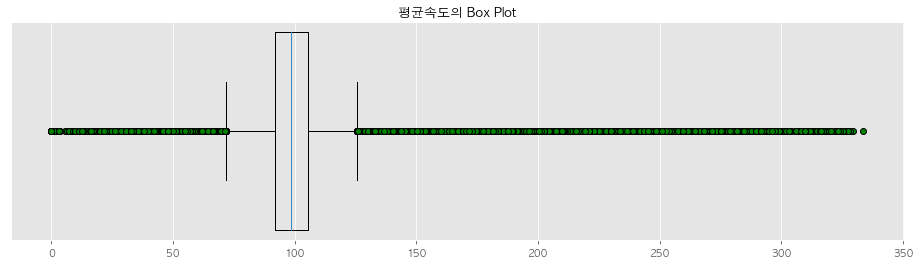

In [39]:
# 평균속도의 Box Plot
plt.figure(figsize = (16, 4))
outlier = {'markerfacecolor' : 'g', 'marker' : 'o'}

plt.boxplot(final['평균속도'], vert = False, widths = 1.5, flierprops = outlier)
plt.yticks([])
plt.title('평균속도의 Box Plot', fontsize = 13)
plt.show()

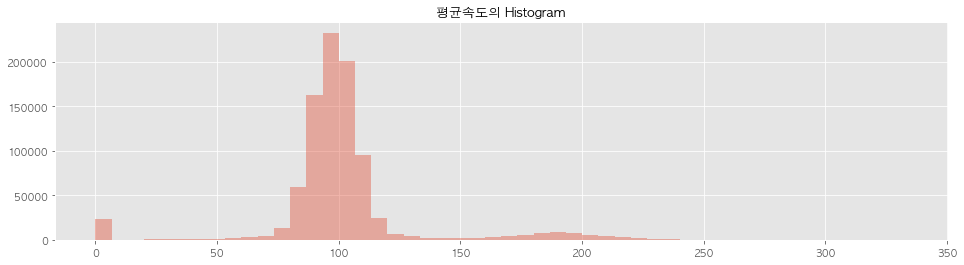

In [40]:
# Error Data 제거 후, 평균속도의 Histogram
plt.figure(figsize = (16, 4))

sns.distplot(final['평균속도'], kde = False)
plt.xlabel('')
plt.title('평균속도의 Histogram', fontsize = 13)
plt.show()

- 위의 시각화를 통하여 속도가 80 ~ 120 사이에 대부분 존재함을 볼 수 있으며, 이상치가 존재함을 볼 수 있다.


- 또한, 평균속도가 0으로 관측된 값이 약 2만개 정도 있음을 볼 수 있다.


- 평균속도가 0으로 관측된 곳이 정체로 인한 것인지, 교통량이 없어서 0으로 관측되었는지 혹은 오류로 측정되었는지 살펴볼 필요가 있다.

In [41]:
# 평균속도가 0인 관측치 추출
속도0_data = final[final['평균속도'] == 0]
print('속도가 0인 데이터의 개수 :', len(속도0_data))
print('속도가 0인 데이터의 비율 :', str(round(len(속도0_data) / len(final) * 100, 2)) + '%', '\n')

print('속도가 0인 VDS의 개수 :', len(속도0_data['VDS_ID'].unique()))
print('속도가 0인 VDS의 비율 :', str(round(len(속도0_data['VDS_ID'].unique()) / len(final['VDS_ID'].unique()) * 100, 2)) + '%')

속도가 0인 데이터의 개수 : 23464
속도가 0인 데이터의 비율 : 2.62% 

속도가 0인 VDS의 개수 : 50
속도가 0인 VDS의 비율 : 7.27%


In [42]:
# 속도가 0으로 측정된 데이터의 교통량
속도0_data['교통량'].value_counts()

0    23464
Name: 교통량, dtype: int64

- 속도가 0으로 측정된 관측치의 교통량을 보면 모두 0임을 볼 수 있으므로 오류가 아님을 알 수 있다.


- 이제 속도가 높은 이상치에 대해서 처리해주자.

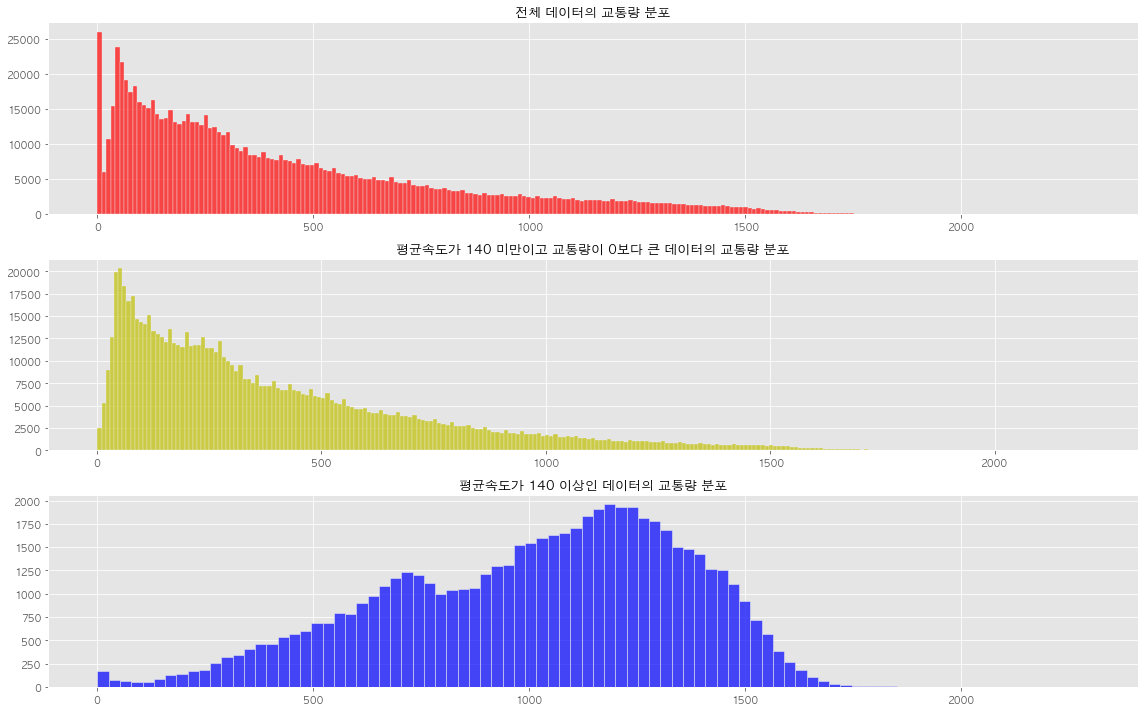

In [43]:
# 평균속도에 따른 '교통량' 시각화
fig, axes = plt.subplots(nrows = 3, figsize = (16, 10))

# 전체 데이터의 교통량 시각화
sns.histplot(final['교통량'], color = 'r', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('전체 데이터의 교통량 분포', fontsize = 13)

# 평균속도가 140 미만이고 교통량이 0보다 큰 데이터의 교통량 시각화
sns.histplot(final[(final['평균속도'] < 140) & (final['교통량'] > 0)]['교통량'], color = 'y', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('평균속도가 140 미만이고 교통량이 0보다 큰 데이터의 교통량 분포', fontsize = 13)

# 평균속도가 140 이상인 데이터의 교통량 시각화
sns.histplot(final[final['평균속도'] >= 140]['교통량'], color = 'b', alpha = 0.7, ax = axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('평균속도가 140 이상인 데이터의 교통량 분포', fontsize = 13)

fig.tight_layout()

- 위의 시각화를 통하여, 첫번째와 두번째는 비슷한 분포를 나타내고 있음을 볼 수 있다.


- 하지만, 고속도로에서 속도가 140 이상임에도 불구하고 교통량이 높은 구간에 많이 분포해 있어 140 이상이면 이상치로 판단하였다.

In [44]:
# 평균속도가 140 이상인 데이터를 만들어주자.
속도이상치data = final[final['평균속도'] >= 140]
속도이상치VDS_list = 속도이상치data['VDS_ID'].unique()
print('속도 이상치 데이터의 개수 :', len(속도이상치data))
print('속도 이상치 VDS의 개수 :', len(속도이상치VDS_list), '\n')

# VDS 장치가 센서로 측정하기 때문에 이상치를 측정하는 경우도 있고, 올바른 값을 측정하는 경우도 있다고 한다.
# 따라서, 이상치를 기록한 VDS 장치를 찾아서 각 VDS 장치에서 기록한 관측치의 '중앙값'으로 대체해주자.
for item in 속도이상치VDS_list:
    value = round(final[final['VDS_ID'] == item]['평균속도'].median(), 3)
    final.loc[(final['VDS_ID'] == item) & (final['평균속도'] >= 140), '평균속도'] = value
    
# 중앙값으로 대체 후에도 속도가 140이상인 관측치가 존재하였다.
# 대체 후에도 140이상인 데이터는 오류로 판단하고 제거해주도록 하자.   
오류data = final[final['평균속도'] >= 140]
오류VDS_list = 오류data['VDS_ID'].unique()
print('속도 140이상 중앙값 대체 후 이상치 데이터의 개수 :', len(오류data))
print('속도 140이상 중앙값 대체 후 이상치 데이터 VDS의 개수 :', len(set(오류data['VDS_ID'])), '\n')
    
# 최종 데이터 생성
final = final[~final['VDS_ID'].isin(오류VDS_list)]
print('최종 데이터의 행과 열의 개수 :', final.shape)
print('최종 데이터의 VDS의 개수 :', len(set(final['VDS_ID'])))

속도 이상치 데이터의 개수 : 59509
속도 이상치 VDS의 개수 : 202 

속도 140이상 중앙값 대체 후 이상치 데이터의 개수 : 20669
속도 140이상 중앙값 대체 후 이상치 데이터 VDS의 개수 : 28 

최종 데이터의 행과 열의 개수 : (859749, 14)
최종 데이터의 VDS의 개수 : 660


In [45]:
display(final.describe())

,VDS존 길이(km),지점이정(km),기준시간,기준시,Month,Day,교통량,평균속도,holiday,group
count,859749.000000,859749.000000,859749.000000,859749.000000,859749.0,859749.000000,859749.000000,859749.000000,859749.000000,859749.000000
mean,1.108446,194.866737,11.492003,22.497322,8.0,19.487353,410.381031,95.362745,0.356755,18.008769
std,0.408367,113.542946,6.925606,16.771557,0.0,4.034067,360.953198,19.247751,0.479042,11.796270
min,0.300000,1.400000,0.000000,0.000000,8.0,13.000000,0.000000,0.000000,0.000000,1.000000
25%,0.900000,95.500000,5.000000,0.000000,8.0,16.000000,129.000000,91.520000,0.000000,7.000000
50%,1.000000,194.400000,11.000000,15.000000,8.0,19.000000,299.000000,97.750000,0.000000,17.000000
75%,1.200000,288.400000,18.000000,30.000000,8.0,23.000000,593.000000,104.000000,1.000000,29.000000
max,4.320000,415.300000,23.000000,45.000000,8.0,26.000000,2208.000000,139.990000,1.000000,35.000000


- 이상치를 처리해주고 난 후, 평균속도의 최대값이 **140** 이하 임을 확인할 수 있다.

# 5. 데이터 탐색

---

In [48]:
# 데이터 정보 확인
print(final.info(), '\n')

# 데이터 일부 확인
display(final.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859749 entries, 0 to 993215
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   VDS_ID       859749 non-null  object 
 1   기점종점방향구분코드   859749 non-null  object 
 2   VDS존 길이(km)  859749 non-null  float64
 3   지점이정(km)     859749 non-null  float64
 4   기준시간         859749 non-null  int64  
 5   기준시          859749 non-null  int64  
 6   요일명          859749 non-null  object 
 7   노드명          859749 non-null  object 
 8   Month        859749 non-null  int64  
 9   Day          859749 non-null  int64  
 10  교통량          859749 non-null  int64  
 11  평균속도         859749 non-null  float64
 12  holiday      859749 non-null  int64  
 13  group        859749 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 98.4+ MB
None 



,VDS_ID,기점종점방향구분코드,VDS존 길이(km),지점이정(km),기준시간,기준시,요일명,노드명,Month,Day,교통량,평균속도,holiday,group
0,0010VDE00100,E,1.82,1.4,0,0,수요일,구서IC,8,26,74,86.42,0,1
1,0010VDE00100,E,1.82,1.4,1,45,수요일,구서IC,8,26,57,79.39,0,1
2,0010VDE00100,E,1.82,1.4,3,15,수요일,구서IC,8,26,45,81.48,0,1
3,0010VDE00100,E,1.82,1.4,0,15,수요일,구서IC,8,26,66,88.70,0,1
4,0010VDE00100,E,1.82,1.4,2,0,수요일,구서IC,8,26,36,81.66,0,1


## Question 1. VDS존 길이에 따라 평균속도에 변화가 있을까?

## Question 2. 교통량이 많아지면 평균속도가 느려질까?

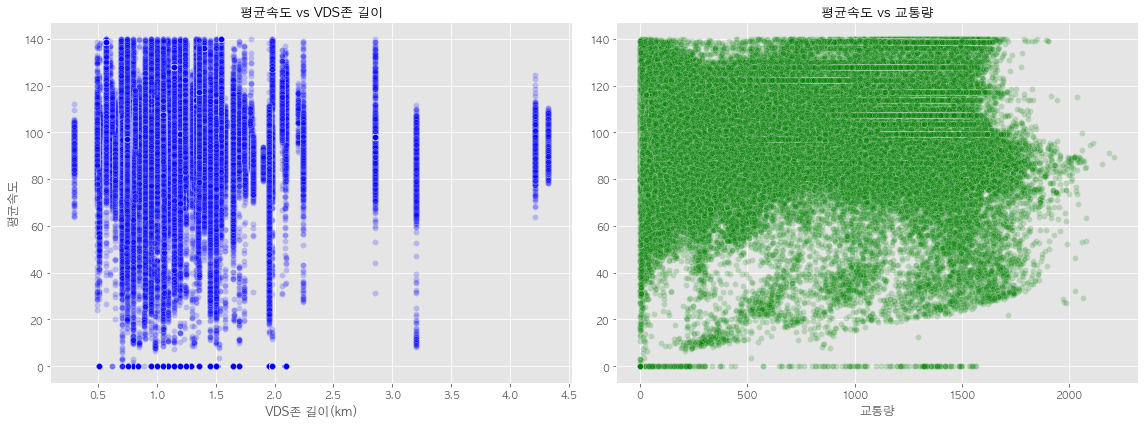

In [49]:
# 시각화
fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

# Question 1
sns.scatterplot(x = 'VDS존 길이(km)', y = '평균속도', data = final, color = 'b', alpha = 0.2, ax = axes[0])
axes[0].set_title('평균속도 vs VDS존 길이', fontsize = 13)

# Question 2
sns.scatterplot(x = '교통량', y = '평균속도', data = final, color = 'g', alpha = 0.2, ax = axes[1])
axes[1].set_title('평균속도 vs 교통량', fontsize = 13)
axes[1].set_ylabel('')

fig.tight_layout()

- 위의 시각화를 통해, **VDS존 길이**와 **교통량**에 따라 평균속도에 큰 차이가 없는 것을 확인할 수 있다.

- 그렇다면, VDS존 길이와 교통량 변수를 구간화해서 살펴보도록 하자.

In [50]:
# VDS존 길이를 구간화 해주는 함수 생성
def vds_transform(x):
    if x <= 1.104:
        return 1
    elif (x > 1.104) & (x <= 1.908):
        return 2
    elif (x > 1.908) & (x <= 2.712):
        return 3
    elif (x > 2.712) & (x <= 3.516):
        return 4
    else:
        return 5
    
# 교통량을 구간화 해주는 함수 생성
def 교통량_transform(x):
    if x <= 552:
        return 1
    elif (x > 552) & (x <= 1104):
        return 2
    elif (x > 1104) & (x <= 1656):
        return 3
    else:
        return 4

In [51]:
print('변수 추가 전 데이터의 행과 열의 개수 :', final.shape, '\n')

final['VDS Band'] = final['VDS존 길이(km)'].apply(vds_transform)
final['교통량 Band'] = final['교통량'].apply(교통량_transform)
print('변수 추가 후 데이터의 행과 열의 개수 :', final.shape)

변수 추가 전 데이터의 행과 열의 개수 : (859749, 14) 

변수 추가 후 데이터의 행과 열의 개수 : (859749, 16)


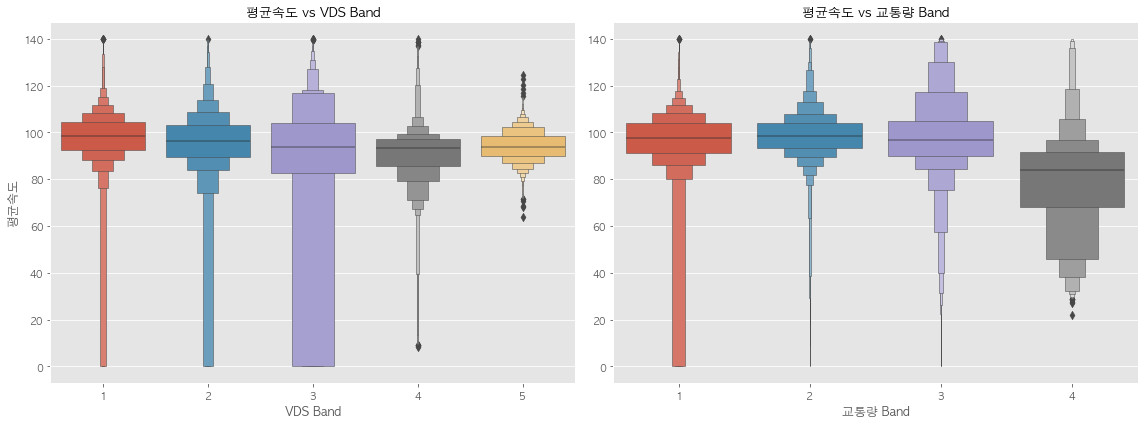

In [52]:
# 시각화를 통해 확인
fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

# VDS Band
sns.boxenplot(x = 'VDS Band', y = '평균속도', data = final, ax = axes[0])
axes[0].set_title('평균속도 vs VDS Band', fontsize = 13)

# 교통량 Band
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = final, ax = axes[1])
axes[1].set_title('평균속도 vs 교통량 Band', fontsize = 13)
axes[1].set_ylabel('')

fig.tight_layout()

- 구간화를 수행하지 않았을 때와 수행한 후 시각화를 살펴보면, VDS존 길이에 따라서는 평균속도에 큰 차이가 없다.

- 교통량은 약 1600대가 넘어가는 시점부터 다른 구간과 다르게 평균속도가 낮은 값에 분포해 있다. 

## Question 3. 출퇴근 시간에 교통량이 많아서 평균속도가 느려질까?

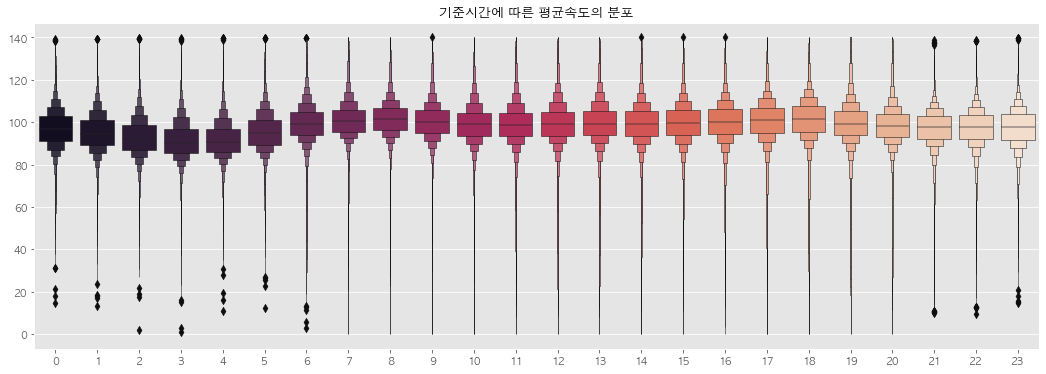

In [53]:
# 시간별 평균속도 분포 확인
plt.figure(figsize = (18, 6))

# 교통량이 없는 관측치는 제외하고 살펴보도록 하자.
sns.boxenplot(x = '기준시간', y = '평균속도', data = final[final['교통량'] > 0], palette = 'rocket')
plt.title('기준시간에 따른 평균속도의 분포', fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.show()

- 전체 데이터의 경우, 출퇴근 시간에 속도가 낮아지지 않고 오히려 새벽 시간대에 속도가 낮게 분포해있음을 확인할 수 있다.

## Question 4. 공휴일, 요일 여부에 따라 평균속도에 차이가 있을까?

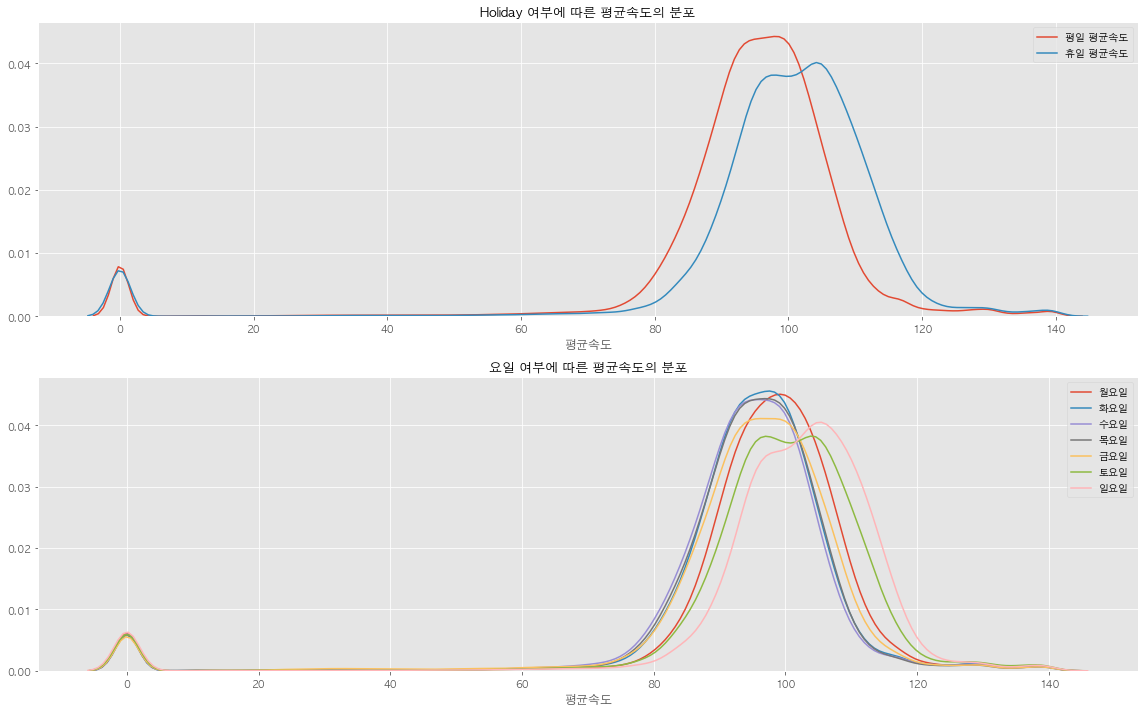

In [54]:
# 평균속도의 분포를 요일명, holiday기준으로 살펴보자.
fig, axes = plt.subplots(nrows = 2, figsize = (16, 10))

# holiday 기준
sns.kdeplot(final[final['holiday'] == 0]['평균속도'], ax = axes[0])
sns.kdeplot(final[final['holiday'] == 1]['평균속도'], ax = axes[0])
axes[0].set_title('Holiday 여부에 따른 평균속도의 분포', fontsize = 13)
axes[0].set_ylabel('')
axes[0].legend(['평일 평균속도', '휴일 평균속도'])

# 요일명 기준
for day in ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']:
    sns.kdeplot(final[final['요일명'] == day]['평균속도'], ax = axes[1])
axes[1].set_title('요일 여부에 따른 평균속도의 분포', fontsize = 13)
axes[1].set_ylabel('')
axes[1].legend(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

fig.tight_layout()

- 2주간의 데이터로 보았을 때, 각 요일에 따른 분포보다는 공휴일 여부에 따른 분포에서 확연한 차이가 있음을 볼 수 있다.

## 5.1 상행 데이터 탐색

In [55]:
# 상행 데이터 추출
busan_data = final[final['기점종점방향구분코드'] == 'E']

print('상행 데이터의 개수 :', len(busan_data), '\n')
print('상행 데이터의 VDS의 개수 :', len(busan_data['VDS_ID'].unique()), '\n')

# 데이터 일부 확인
display(busan_data.head())

상행 데이터의 개수 : 435369 

상행 데이터의 VDS의 개수 : 333 



,VDS_ID,기점종점방향구분코드,VDS존 길이(km),지점이정(km),기준시간,기준시,요일명,노드명,Month,Day,교통량,평균속도,holiday,group,VDS Band,교통량 Band
0,0010VDE00100,E,1.82,1.4,0,0,수요일,구서IC,8,26,74,86.42,0,1,2,1
1,0010VDE00100,E,1.82,1.4,1,45,수요일,구서IC,8,26,57,79.39,0,1,2,1
2,0010VDE00100,E,1.82,1.4,3,15,수요일,구서IC,8,26,45,81.48,0,1,2,1
3,0010VDE00100,E,1.82,1.4,0,15,수요일,구서IC,8,26,66,88.70,0,1,2,1
4,0010VDE00100,E,1.82,1.4,2,0,수요일,구서IC,8,26,36,81.66,0,1,2,1


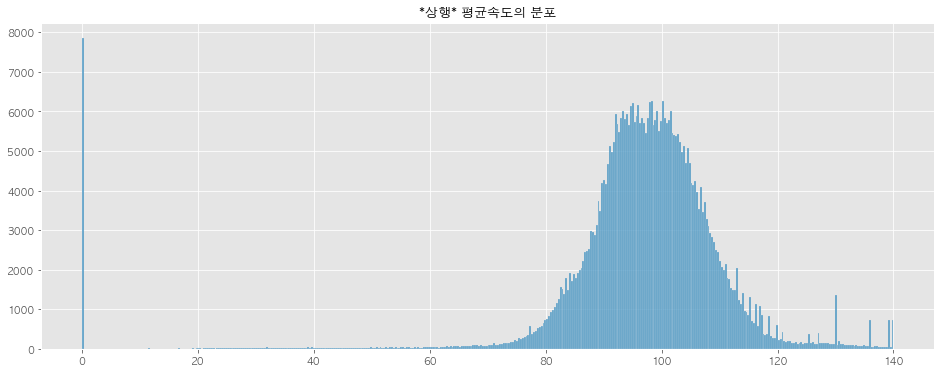

In [56]:
# 상행 데이터의 평균속도 분포
plt.figure(figsize = (16, 6))

sns.histplot(busan_data['평균속도'])
plt.xlabel('')
plt.ylabel('')
plt.title('*상행* 평균속도의 분포', fontsize = 13)
plt.show()

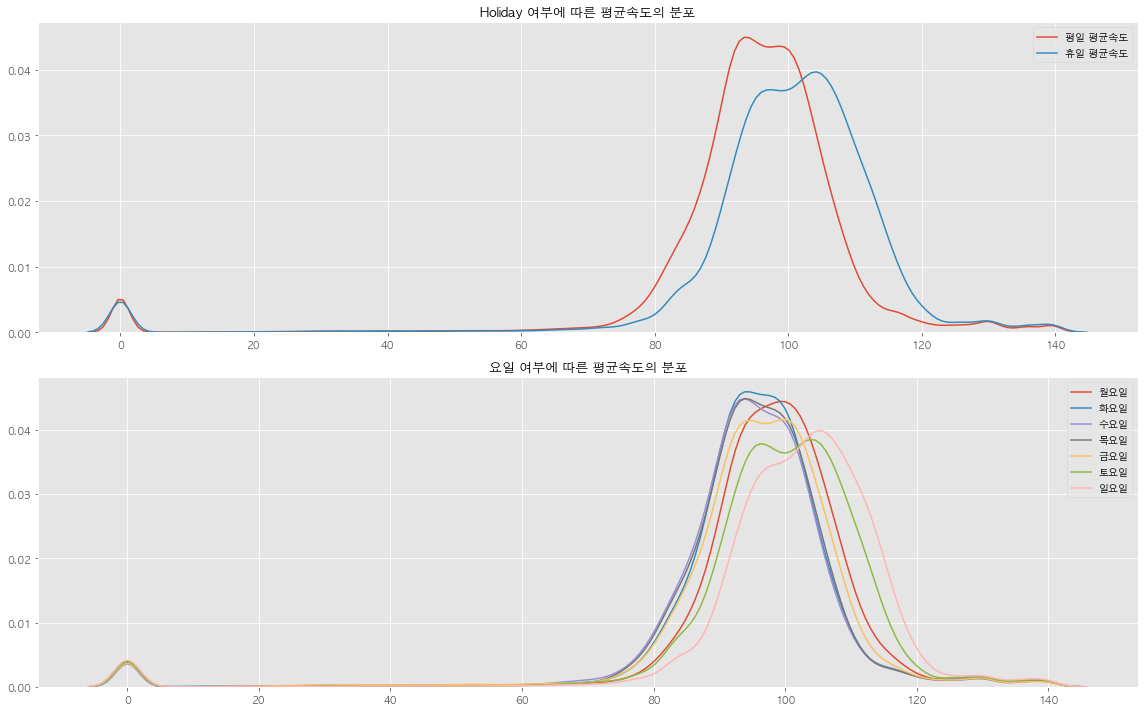

In [57]:
# 평균속도의 분포를 요일명, holiday 기준으로 살펴보자.
fig, axes = plt.subplots(nrows = 2, figsize = (16, 10))

# Holiday
sns.kdeplot(busan_data[busan_data['holiday'] == 0]['평균속도'], ax = axes[0])
sns.kdeplot(busan_data[busan_data['holiday'] == 1]['평균속도'], ax = axes[0])
axes[0].set_title('Holiday 여부에 따른 평균속도의 분포', fontsize = 13)
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].legend(['평일 평균속도', '휴일 평균속도'])

# 요일명 기준
for day in ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']:
    sns.kdeplot(busan_data[busan_data['요일명'] == day]['평균속도'], ax = axes[1])
axes[1].set_title('요일 여부에 따른 평균속도의 분포', fontsize = 13)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].legend(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

fig.tight_layout()

- 전체 데이터를 살펴보았을 때와 비슷한 분포를 나타내고 있음을 볼 수 있다.

- 요일에 따른 분포를 살펴보아도 주말에 속도가 좀 더 높은값에 분포해 있음을 볼 수 있다.

- 요일명 변수를 사용해도 무방할 것으로 판단되지만, 현재 2주간의 데이터 중에서 월요일 하루가 공휴일로 지정되어 있으므로 Holiday 변수를 사용하도록 하자.

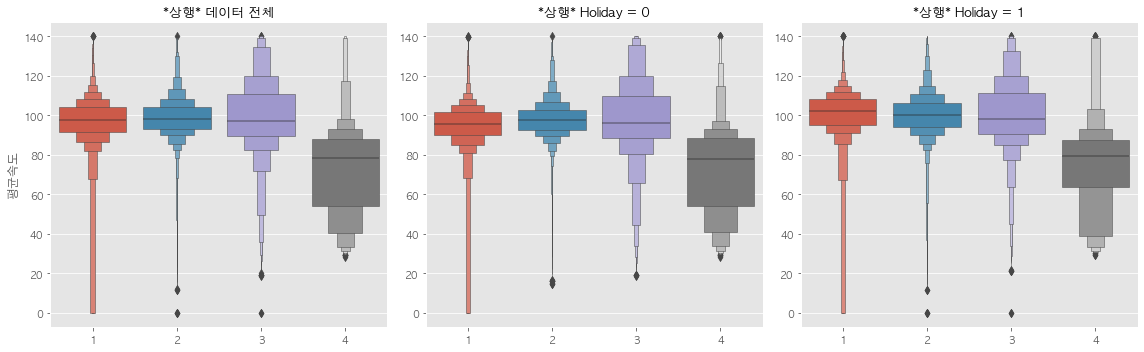

In [58]:
# 교통량 Band, Holiday
fig, axes = plt.subplots(ncols = 3, figsize = (16, 5))

# 상행 데이터 전체
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = busan_data, ax = axes[0])
axes[0].set_title('*상행* 데이터 전체', fontsize = 13)
axes[0].set_xlabel('')

# Holiday = 0
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = busan_data[busan_data['holiday'] == 0], ax = axes[1])
axes[1].set_title('*상행* Holiday = 0', fontsize = 13)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Holiday = 1
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = busan_data[busan_data['holiday'] == 1], ax = axes[2])
axes[2].set_title('*상행* Holiday = 1', fontsize = 13)
axes[2].set_xlabel('')
axes[2].set_ylabel('')

fig.tight_layout()

- 상행 데이터의 경우에도, 교통량이 약 1600대가 넘어가는 시점부터 속도가 낮은값에 분포해 있음을 볼 수 있다.

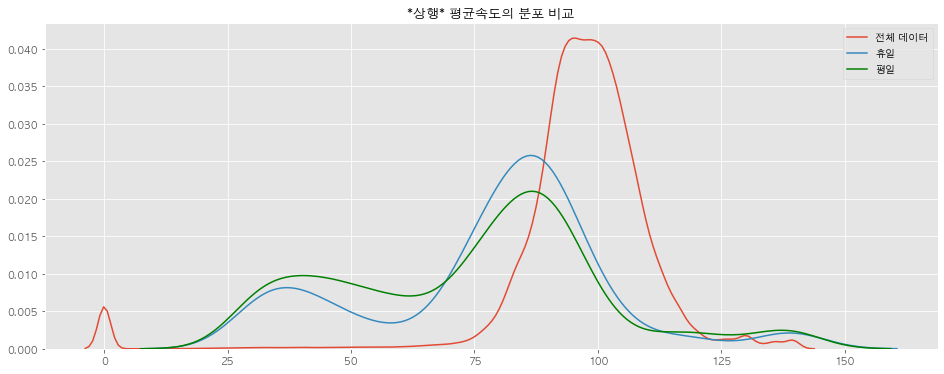

In [59]:
# 교통량이 1600대가 넘어가고, Holiday 여부에 따라 평균속도를 살펴보자.
plt.figure(figsize = (16, 6))

# 상행 전체 데이터의 분포
sns.kdeplot(busan_data['평균속도'])

# 교통량 1600, Holiday = 1
plot_data = busan_data[(busan_data['교통량'] >= 1600) & (busan_data['holiday'] == 1)]
sns.kdeplot(plot_data['평균속도'])

# 교통량 1600, Holiday = 0
plot_data = busan_data[(busan_data['교통량'] >= 1600) & (busan_data['holiday'] == 0)]
sns.kdeplot(plot_data['평균속도'], color = 'g')

plt.title('*상행* 평균속도의 분포 비교', fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.legend(['전체 데이터', '휴일', '평일'])
plt.show()

- 교통량이 1600대가 넘어가면 확실히 전체 데이터보다 평균속도가 낮은 값에 분포함을 볼 수 있다.


- 평일과 휴일 분포가 비슷하지만, 대략 80 ~ 110 구간에서는 평일의 평균속도 빈도가 낮음을 볼 수 있다.

- 교통량 1600대가 넘어가는 Group을 살펴보도록 하자.

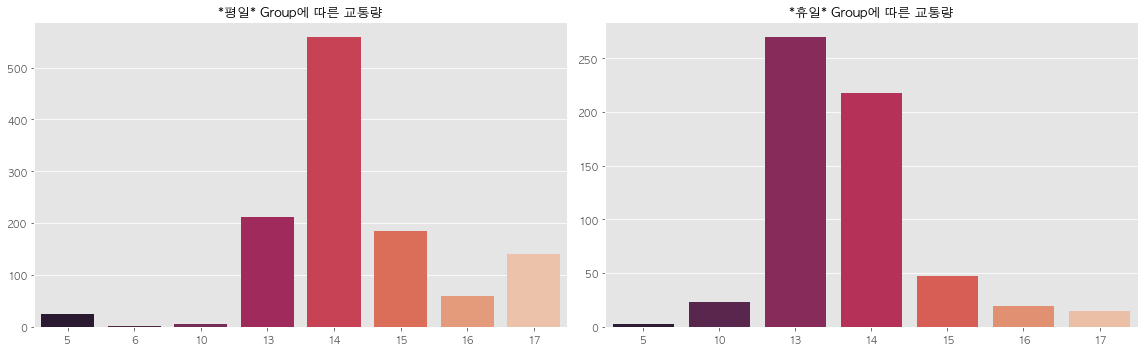

In [60]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# Holiday = 0
plot_data = pd.DataFrame(busan_data[(busan_data['교통량'] >= 1600) &\
                                    (busan_data['holiday'] == 0)]['group'].value_counts()).sort_index()
sns.barplot(x = plot_data.index, y = 'group', data = plot_data, ax = axes[0], palette = 'rocket')
axes[0].set_title('*평일* Group에 따른 교통량', fontsize = 13)
axes[0].set_ylabel('')

# Holiday = 1
plot_data = pd.DataFrame(busan_data[(busan_data['교통량'] >= 1600) &\
                                    (busan_data['holiday'] == 1)]['group'].value_counts()).sort_index()
sns.barplot(x = plot_data.index, y = 'group', data = plot_data, ax = axes[1], palette = 'rocket')
axes[1].set_title('*휴일* Group에 따른 교통량', fontsize = 13)
axes[1].set_ylabel('')

fig.tight_layout()

- **13, 14** Group에서 교통량이 많음을 볼 수 있다.

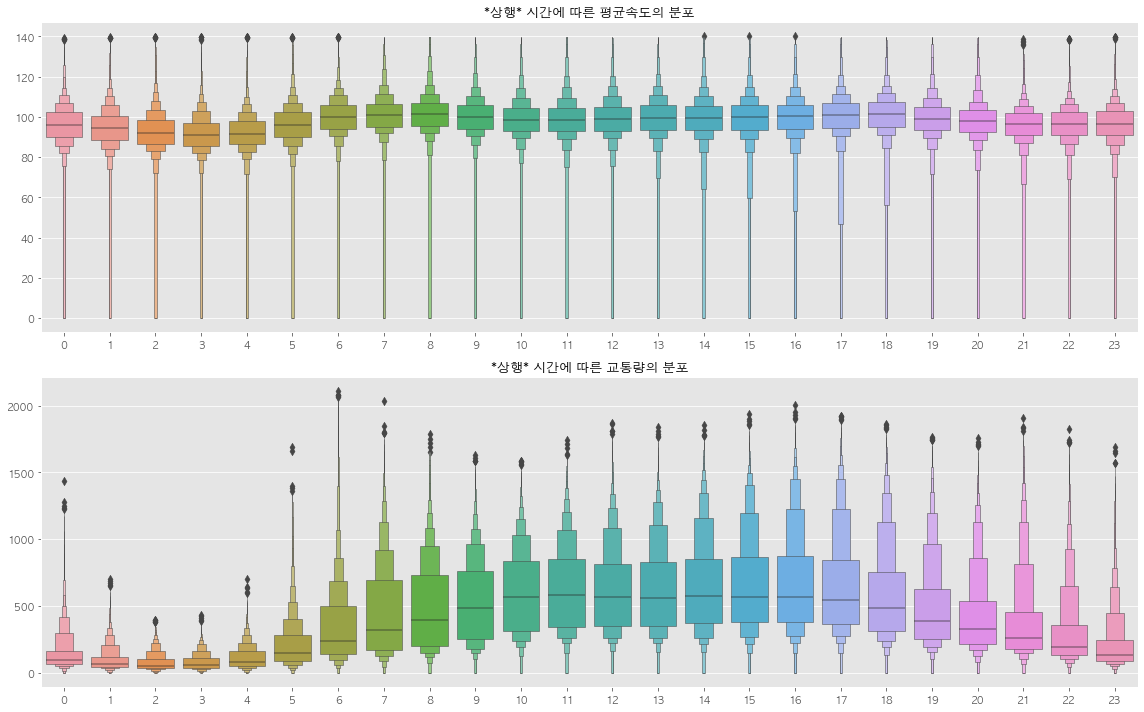

In [61]:
# 시간에 따라 평균속도와 교통량의 분포를 살펴보자.
fig, axes = plt.subplots(nrows = 2, figsize = (16, 10))

# 평균속도
sns.boxenplot(x = '기준시간', y = '평균속도', data = busan_data, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('*상행* 시간에 따른 평균속도의 분포', fontsize = 13)

# 교통량
sns.boxenplot(x = '기준시간', y = '교통량', data = busan_data, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('*상행* 시간에 따른 교통량의 분포', fontsize = 13)

fig.tight_layout()

- 시간에 따라 평균속도에는 큰 차이를 발견할 수 없다.


- **'출퇴근 시간에 평균속도가 늦어질 것이다'** 라고 추측했지만, 출퇴근 시간보다 새벽 시간대(02시 ~ 05시)에 평균속도가 낮게 분포해 있다.


- 06시부터 교통량이 많아짐을 볼 수 있으며, 17시부터 교통량이 점차 감소하고 있다.

In [63]:
# 시간과 분에 따라서 평균속도와 교통량 분포를 확인할 수 있는 함수 생성
def 시간_plot(hour = 1):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # 시각화 데이터 생성
    plot_data = busan_data[busan_data['기준시간'] == hour]
    
    # 평균속도
    sns.boxenplot(x = '기준시', y = '평균속도', data = plot_data, ax = axes[0])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_title('*{}시* 평균속도의 분포'.format(hour), fontsize = 13)
    
    # 교통량
    sns.boxenplot(x = '기준시', y = '교통량', data = plot_data, ax = axes[1])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].set_title('*{}시* 교통량의 분포'.format(hour), fontsize = 13)
    
    fig.tight_layout()

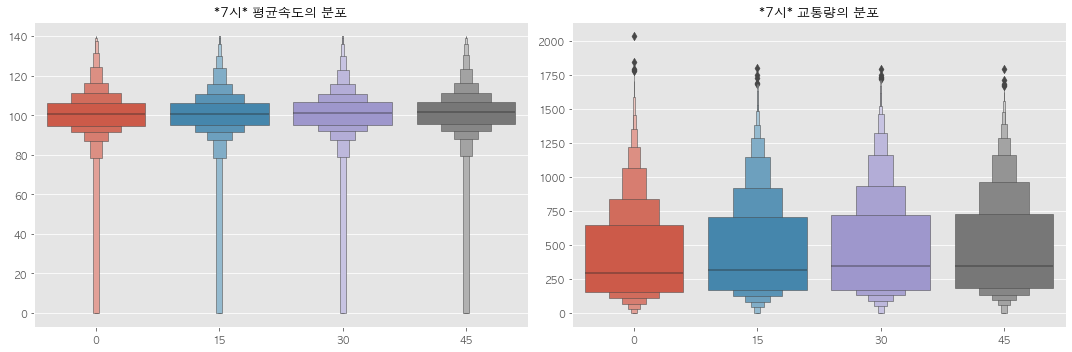

In [64]:
# 7시 확인
시간_plot(hour = 7)

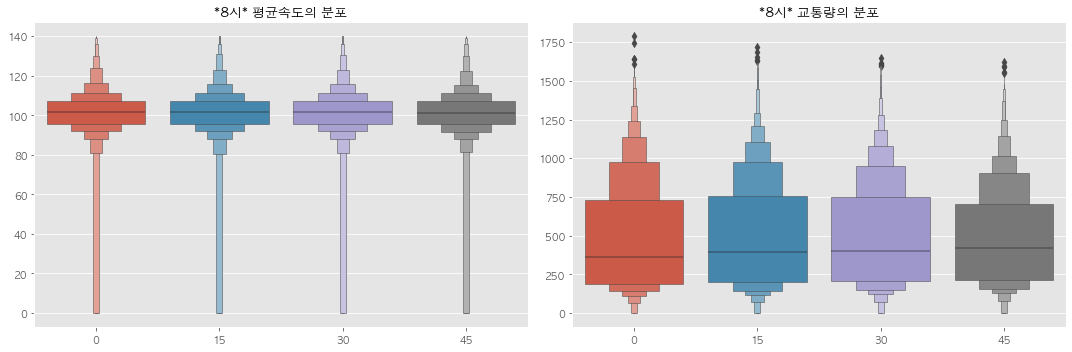

In [65]:
# 8시 확인
시간_plot(hour = 8)

- 분 단위로 자세히 살펴보아도, 평균속도와 교통량에 큰 변화를 관찰할 수 없다.


- 시간이 아닌 분을 나타내는 **기준시** 변수를 사용하여 예측 모델을 구축하는 것은 도움이 될거같지 않다.

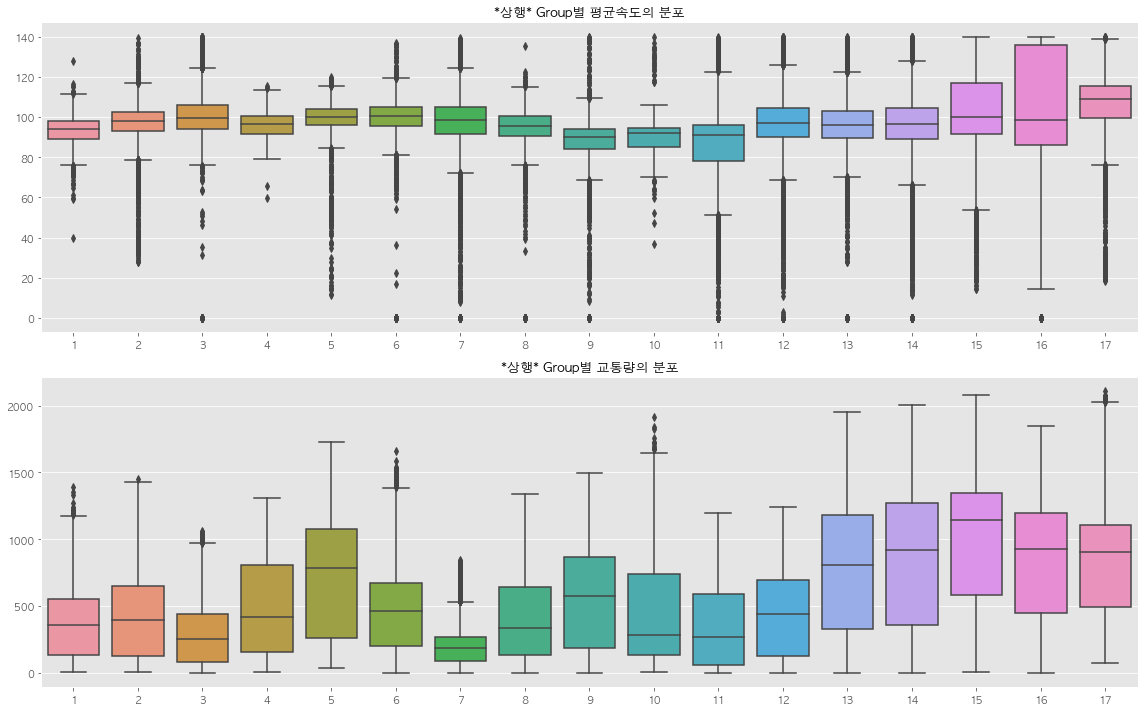

In [66]:
# Group에 따라서 평균속도와 교통량의 분포를 확인
fig, axes = plt.subplots(nrows = 2, figsize = (16, 10))

# 평균속도의 분포
sns.boxplot(x = 'group', y = '평균속도', data = busan_data, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('*상행* Group별 평균속도의 분포', fontsize = 13)

# 교통량의 분포
sns.boxplot(x = 'group', y = '교통량', data = busan_data, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('*상행* Group별 교통량의 분포', fontsize = 13)

fig.tight_layout()

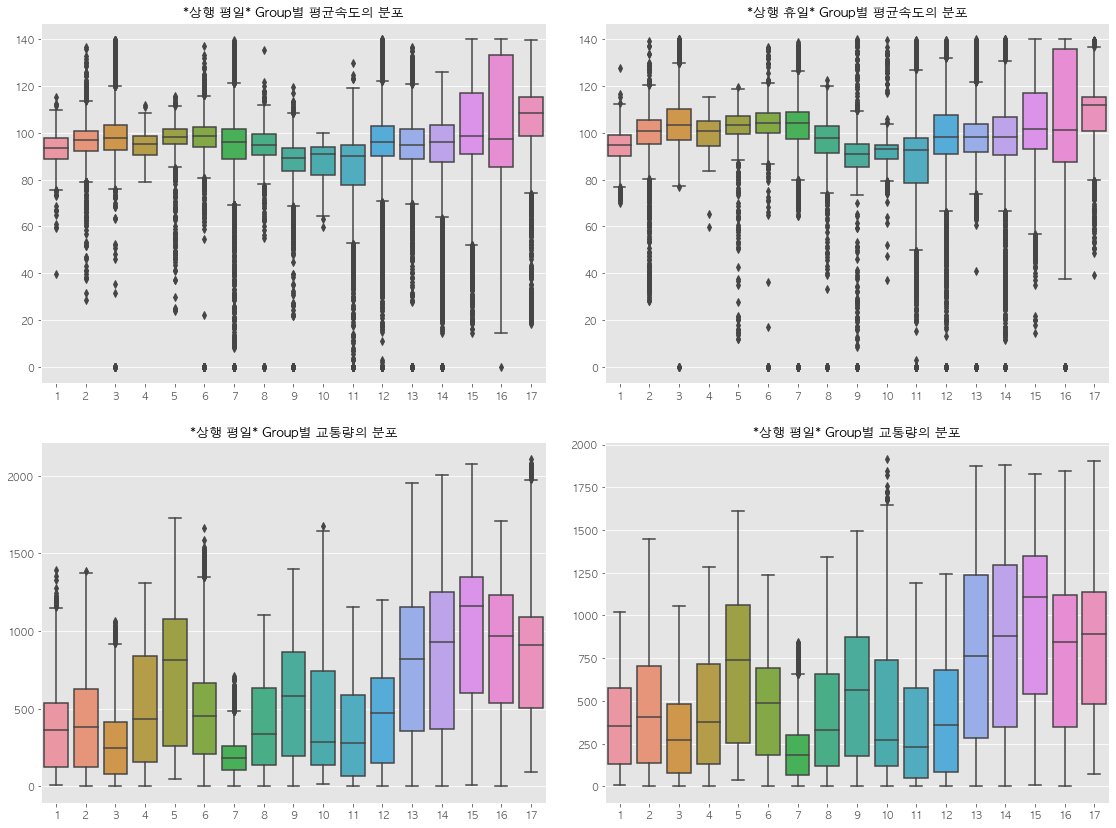

In [67]:
# Holiday 여부에 따라 확인
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 12))

# 평균속도
# Holiday = 0
sns.boxplot(x = 'group', y = '평균속도', data = busan_data[busan_data['holiday'] == 0], ax = axes[0][0])
axes[0][0].set_title('*상행 평일* Group별 평균속도의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = 'group', y = '평균속도', data = busan_data[busan_data['holiday'] == 1], ax = axes[0][1])
axes[0][1].set_title('*상행 휴일* Group별 평균속도의 분포', fontsize = 13)

# 교통량
# Holidayt = 0
sns.boxplot(x = 'group', y = '교통량', data = busan_data[busan_data['holiday'] == 0], ax = axes[1][0])
axes[1][0].set_title('*상행 평일* Group별 교통량의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = 'group', y = '교통량', data = busan_data[busan_data['holiday'] == 1], ax = axes[1][1])
axes[1][1].set_title('*상행 평일* Group별 교통량의 분포', fontsize = 13)

for row in [0, 1]:
    for col in [0, 1]:
        axes[row][col].set_xlabel('')
        axes[row][col].set_ylabel('')
        
fig.tight_layout(pad = 2.5)

- Group 9, 10, 11 세 곳이 다른 부분에 비해, 평균속도가 낮게 분포해 있음을 볼 수 있다.


- Group 13, 14, 15, 16, 17 총 5개의 그룹에 비해 교통량이 높게 분포해 있음을 볼 수 있다.


- 평일과 휴일에 따라 Group별 평균속도와 교통량에는 큰 차이가 없는것을 볼 수 있다.

## 5.2 하행 데이터 탐색

In [68]:
# 하행 데이터 추출
seoul_data = final[final['기점종점방향구분코드'] == 'S']

print('하행 데이터의 개수 :', len(seoul_data), '\n')
print('하행 데이터의 VDS의 개수 :', len(seoul_data['VDS_ID'].unique()), '\n')

display(seoul_data.head())

하행 데이터의 개수 : 424380 

하행 데이터의 VDS의 개수 : 327 



,VDS_ID,기점종점방향구분코드,VDS존 길이(km),지점이정(km),기준시간,기준시,요일명,노드명,Month,Day,교통량,평균속도,holiday,group,VDS Band,교통량 Band
508032,0010VDS00100,S,1.82,1.4,0,0,수요일,영락IC,8,26,106,95.13,0,35,2,1
508033,0010VDS00100,S,1.82,1.4,1,45,수요일,영락IC,8,26,38,84.74,0,35,2,1
508034,0010VDS00100,S,1.82,1.4,3,15,수요일,영락IC,8,26,40,87.84,0,35,2,1
508035,0010VDS00100,S,1.82,1.4,0,15,수요일,영락IC,8,26,107,94.68,0,35,2,1
508036,0010VDS00100,S,1.82,1.4,2,0,수요일,영락IC,8,26,42,85.09,0,35,2,1


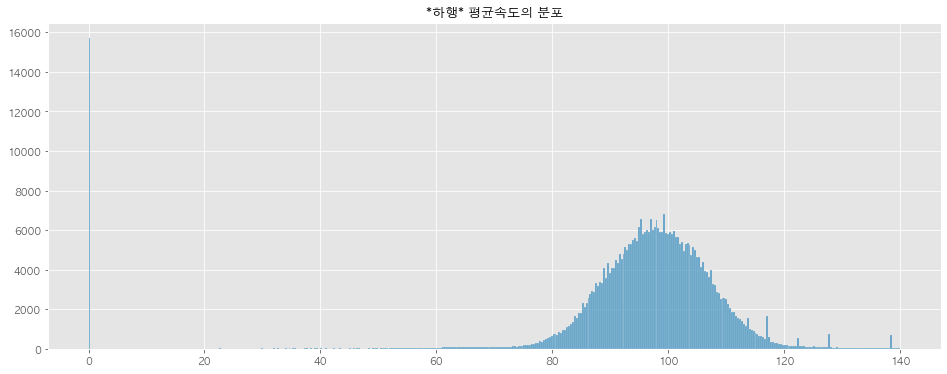

In [69]:
# 하행 데이터의 평균속도 분포
plt.figure(figsize = (16, 6))

sns.histplot(seoul_data['평균속도'])
plt.title('*하행* 평균속도의 분포', fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.show()

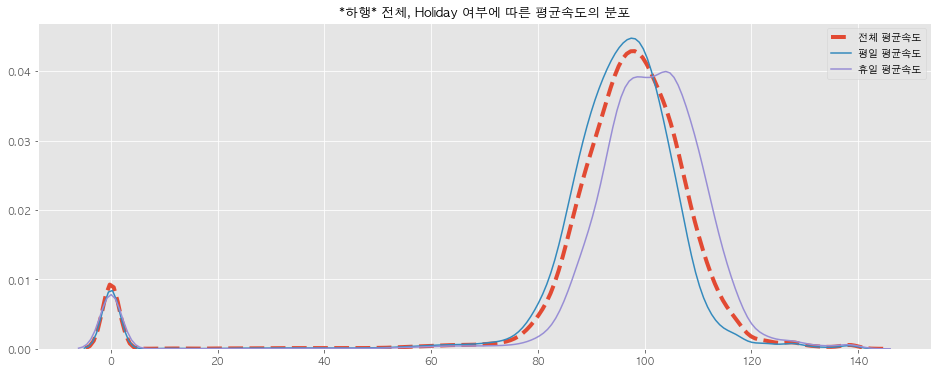

In [70]:
# 평균속도의 분포를 전체, holiday 기준으로 살펴보자.
plt.figure(figsize = (16, 6))

sns.kdeplot(seoul_data['평균속도'], linestyle = '--', linewidth = 4)
sns.kdeplot(seoul_data[seoul_data['holiday'] == 0]['평균속도'])
sns.kdeplot(seoul_data[seoul_data['holiday'] == 1]['평균속도'])
plt.title('*하행* 전체, Holiday 여부에 따른 평균속도의 분포', fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.legend(['전체 평균속도', '평일 평균속도', '휴일 평균속도'])
plt.show()

- 하행 데이터의 경우에도 평일보다 휴일에 평균속도가 좀 더 높은값에 분포해 있음을 볼 수 있다.

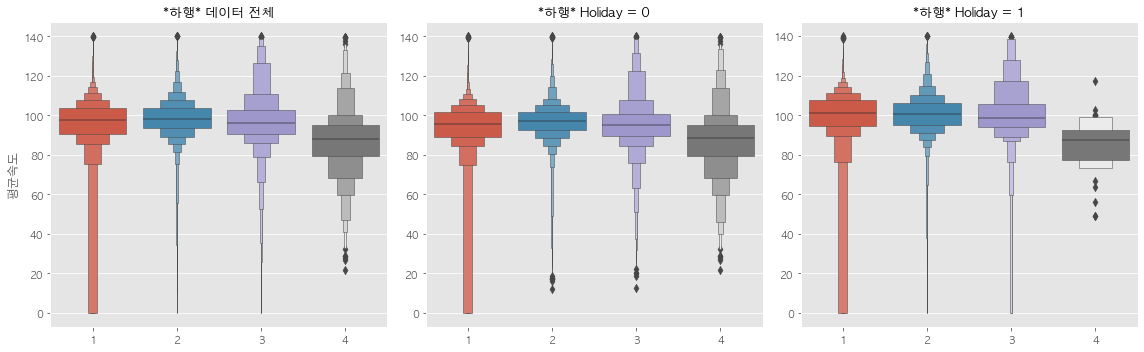

In [71]:
# 교통량 Band, Holiday
fig, axes = plt.subplots(ncols = 3, figsize = (16, 5))

# 하행 데이터 전체
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = seoul_data, ax = axes[0])
axes[0].set_title('*하행* 데이터 전체', fontsize = 13)
axes[0].set_xlabel('')

# Holiday = 0
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 0], ax = axes[1])
axes[1].set_title('*하행* Holiday = 0', fontsize = 13)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Holiday = 1
sns.boxenplot(x = '교통량 Band', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 1], ax = axes[2])
axes[2].set_title('*하행* Holiday = 1', fontsize = 13)
axes[2].set_xlabel('')
axes[2].set_ylabel('')

fig.tight_layout()

- 하행 데이터도 교통량이 약 1600대가 넘어가는 시점부터 속도가 낮은값에 분포해 있음을 볼 수 있다.

- 하지만, 상행 데이터보다 낮은 값에 분포해 있는 관측치가 적다.

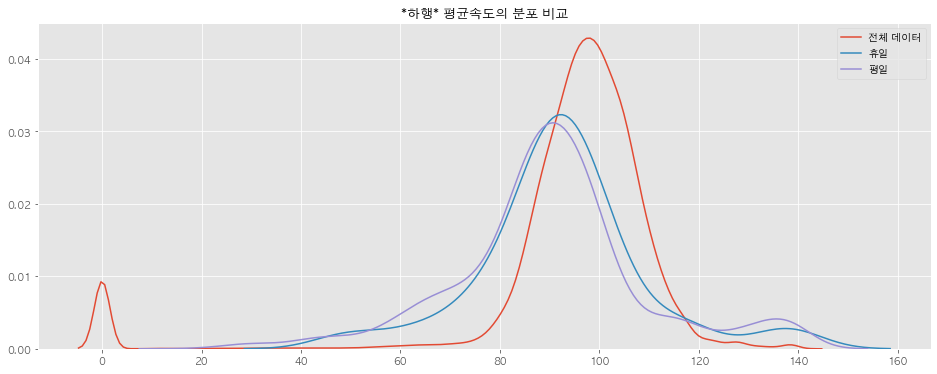

In [73]:
# 교통량이 1600대가 넘어가고, Holiday 여부에 따라 평균속도를 살펴보자.
plt.figure(figsize = (16, 6))

# 하행 전체 데이터의 분포
sns.kdeplot(seoul_data['평균속도'])

# 교통량 1600, Holiday = 1
plot_data = seoul_data[(seoul_data['교통량'] >= 1600) & (seoul_data['holiday'] == 1)]
sns.kdeplot(plot_data['평균속도'])

# 교통량 1600, Holiday = 0
plot_data = seoul_data[(seoul_data['교통량'] >= 1600) & (seoul_data['holiday'] == 0)]
sns.kdeplot(plot_data['평균속도'])

plt.title('*하행* 평균속도의 분포 비교', fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.legend(['전체 데이터', '휴일', '평일'])
plt.show()

- 상행 데이터 보다는 차이의 정도가 낮음을 볼 수 있다.

- 하행 데이터의 경우에도 교통량이 1600대가 넘어가는 Group을 살펴보도록 하자.

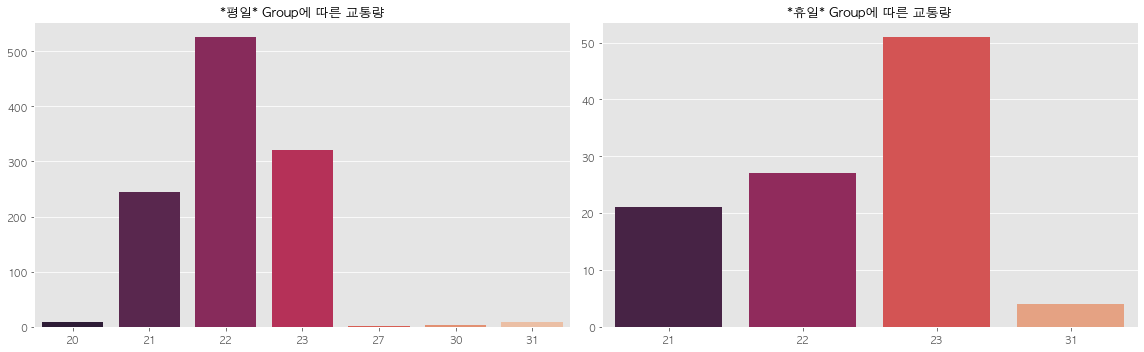

In [74]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))

# Holiday = 0
plot_data = pd.DataFrame(seoul_data[(seoul_data['교통량'] >= 1600) &\
                                   (seoul_data['holiday'] == 0)]['group'].value_counts()).sort_index()
sns.barplot(x = plot_data.index, y = 'group', data = plot_data, ax = axes[0], palette = 'rocket')
axes[0].set_title('*평일* Group에 따른 교통량', fontsize = 13)
axes[0].set_ylabel('')

# Holiday = 1
plot_data = pd.DataFrame(seoul_data[(seoul_data['교통량'] >= 1600) &\
                                   (seoul_data['holiday'] == 1)]['group'].value_counts()).sort_index()
sns.barplot(x = plot_data.index, y = 'group', data = plot_data, ax = axes[1], palette = 'rocket')
axes[1].set_title('*휴일* Group에 따른 교통량', fontsize = 13)
axes[1].set_ylabel('')

fig.tight_layout()

- 상행 데이터보다 교통량이 1600대가 넘어가는 구간이 적게 관측됨을 알 수 있다.


- 주로 21, 22, 23 세 개의 그룹에서 많이 관측됨을 볼 수 있다.

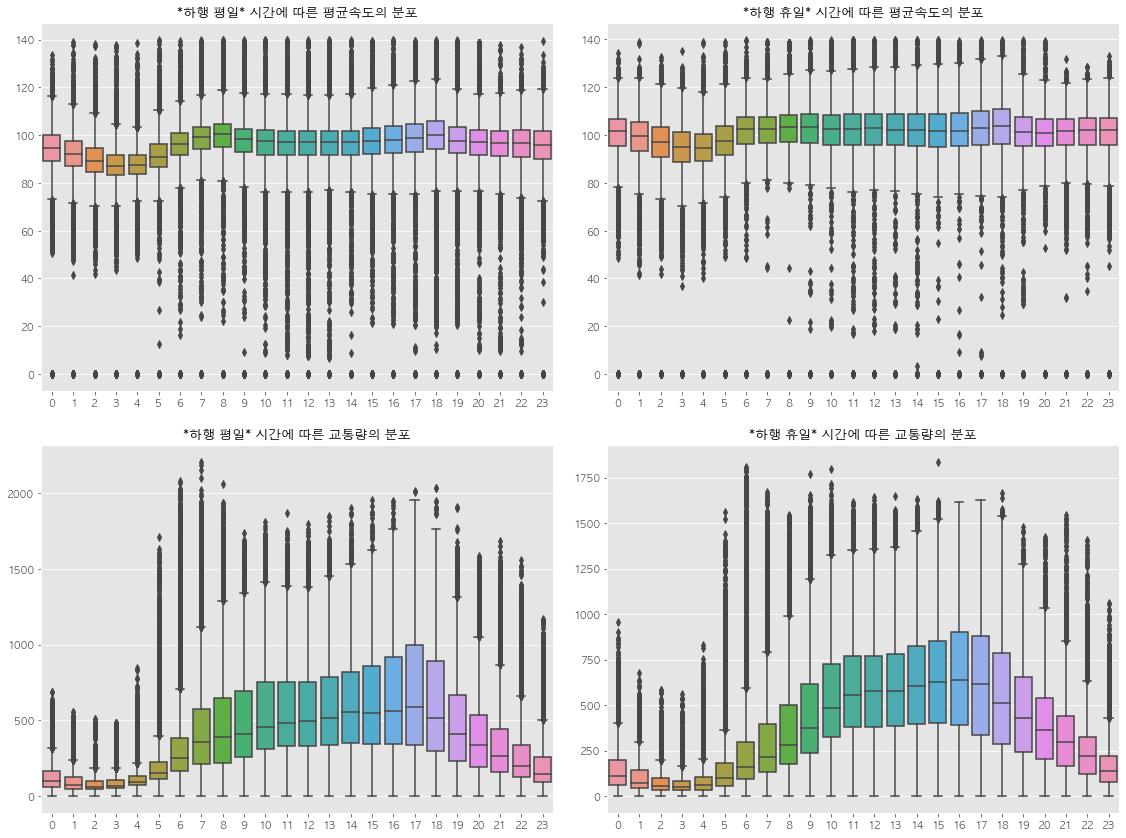

In [75]:
# 기준시간, Holiday에 따른 평균속도와 교통량의 분포
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (16, 12))

# 평균속도
# Holiday = 0
sns.boxplot(x = '기준시간', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 0], ax = axes[0][0])
axes[0][0].set_title('*하행 평일* 시간에 따른 평균속도의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = '기준시간', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 1], ax = axes[0][1])
axes[0][1].set_title('*하행 휴일* 시간에 따른 평균속도의 분포', fontsize = 13)

# 교통량
# Holiday = 0
sns.boxplot(x = '기준시간', y = '교통량', data = seoul_data[seoul_data['holiday'] == 0], ax = axes[1][0])
axes[1][0].set_title('*하행 평일* 시간에 따른 교통량의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = '기준시간', y = '교통량', data = seoul_data[seoul_data['holiday'] == 1], ax = axes[1][1])
axes[1][1].set_title('*하행 휴일* 시간에 따른 교통량의 분포', fontsize = 13)

for row in [0, 1]:
    for col in [0, 1]:
        axes[row][col].set_xlabel('')
        axes[row][col].set_ylabel('')
        
fig.tight_layout(pad = 2)

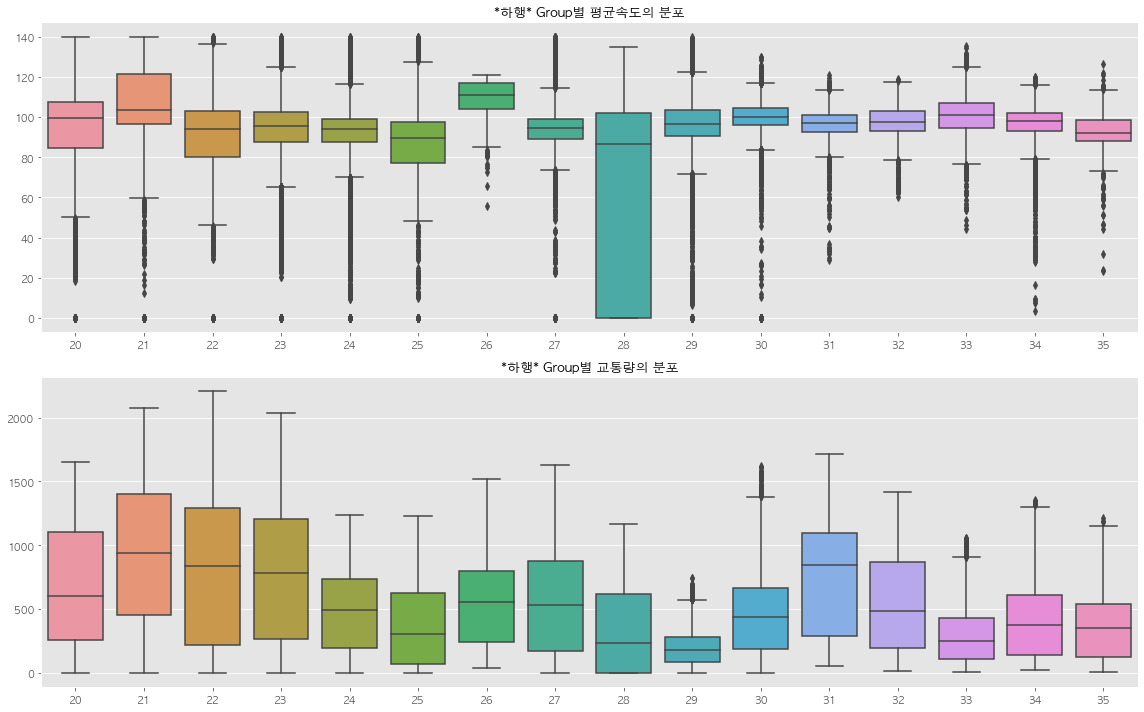

In [76]:
# Group에 따라서 평균속도와 교통량의 분포를 확인
fig, axes = plt.subplots(nrows = 2, figsize = (16, 10))

# 평균속도의 분포
sns.boxplot(x = 'group', y = '평균속도', data = seoul_data, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('*하행* Group별 평균속도의 분포', fontsize = 13)

# 교통량의 분포
sns.boxplot(x = 'group', y = '교통량', data = seoul_data, ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('*하행* Group별 교통량의 분포', fontsize = 13)

fig.tight_layout()

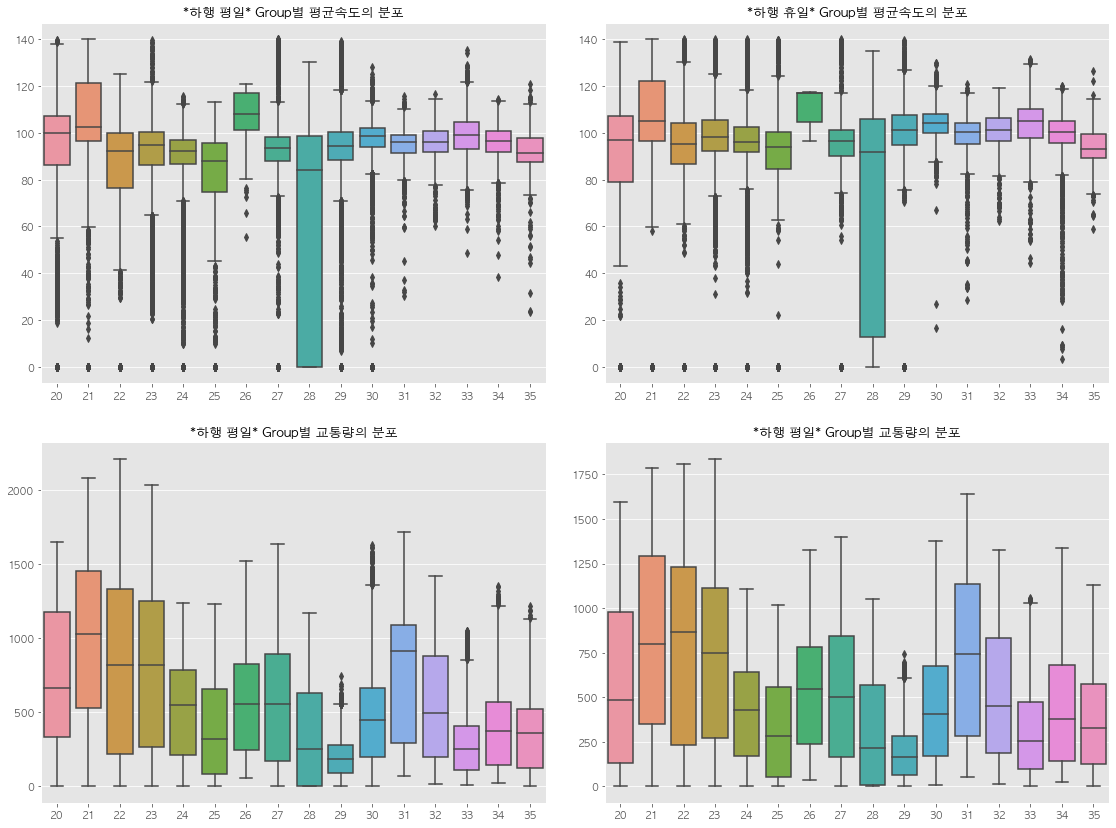

In [77]:
# Holiday 여부에 따라 확인
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 12))

# 평균속도
# Holiday = 0
sns.boxplot(x = 'group', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 0], ax = axes[0][0])
axes[0][0].set_title('*하행 평일* Group별 평균속도의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = 'group', y = '평균속도', data = seoul_data[seoul_data['holiday'] == 1], ax = axes[0][1])
axes[0][1].set_title('*하행 휴일* Group별 평균속도의 분포', fontsize = 13)

# 교통량
# Holidayt = 0
sns.boxplot(x = 'group', y = '교통량', data = seoul_data[seoul_data['holiday'] == 0], ax = axes[1][0])
axes[1][0].set_title('*하행 평일* Group별 교통량의 분포', fontsize = 13)

# Holiday = 1
sns.boxplot(x = 'group', y = '교통량', data = seoul_data[seoul_data['holiday'] == 1], ax = axes[1][1])
axes[1][1].set_title('*하행 평일* Group별 교통량의 분포', fontsize = 13)

for row in [0, 1]:
    for col in [0, 1]:
        axes[row][col].set_xlabel('')
        axes[row][col].set_ylabel('')
        
fig.tight_layout(pad = 2.5)

# 6. 데이터 추출

---

In [78]:
# 최종적으로 사용할 변수만 남기고 저장
final = final[['VDS_ID', '기점종점방향구분코드', '기준시간', '기준시', 'Day', 'holiday', '교통량', '평균속도']]
final.rename(columns = {'기준시' : '기준분'}, inplace = True)

display(final.head(3))

,VDS_ID,기점종점방향구분코드,기준시간,기준분,Day,holiday,교통량,평균속도
0,0010VDE00100,E,0,0,26,0,74,86.42
1,0010VDE00100,E,1,45,26,0,57,79.39
2,0010VDE00100,E,3,15,26,0,45,81.48


In [82]:
# 최종 상행 데이터 생성
busan_data = final[final['기점종점방향구분코드'] == 'E']

# 사용하지 않는 변수 삭제
busan_data.drop(['기점종점방향구분코드'], axis = 1, inplace = True)

# 모델에 적용하기 위해 시간순으로 정렬
busan_data.sort_values(by = ['Day', '기준시간', '기준분'], inplace = True)

# 인덱스를 새로 지정
busan_data.reset_index(inplace = True, drop = True)

display(busan_data.head())

,VDS_ID,기준시간,기준분,Day,holiday,교통량,평균속도
0,0010VDE00100,0,0,13,0,84,86.49
1,0010VDE00200,0,0,13,0,80,100.58
2,0010VDE00300,0,0,13,0,80,93.85
3,0010VDE00500,0,0,13,0,82,91.47
4,0010VDE00700,0,0,13,0,98,99.47


In [83]:
# 최종 하행 데이터 생성
seoul_data = final[final['기점종점방향구분코드'] == 'S']

# 사용하지 않는 변수 삭제
seoul_data.drop(['기점종점방향구분코드'], axis = 1, inplace = True)

# 모델에 적용하기 위해 시간순으로 정렬
seoul_data.sort_values(by = ['Day', '기준시간', '기준분'], inplace = True)

# 인덱스를 새로 지정
seoul_data.reset_index(inplace = True, drop = True)

display(seoul_data.head())

,VDS_ID,기준시간,기준분,Day,holiday,교통량,평균속도
0,0010VDS00100,0,0,13,0,127,93.23
1,0010VDS00200,0,0,13,0,128,99.49
2,0010VDS00300,0,0,13,0,118,96.15
3,0010VDS00500,0,0,13,0,105,102.99
4,0010VDS00700,0,0,13,0,137,96.13


- 마지막으로, 고속도로의 경우 해당 지점의 VDS 속도가 전 지점 VDS 속도의 영향을 받으므로 **이전 VDS 속도**와 **이후 VDS 속도** 두 변수를 추가해주도록 하자.

In [84]:
# 상행 데이터
이전VDS = busan_data['평균속도'].shift(1)
이후VDS = busan_data['평균속도'].shift(-1)

# 변수 추가
busan_data['이전VDS'], busan_data['이후VDS'] = 이전VDS, 이후VDS
busan_data.fillna(0, inplace = True)

display(busan_data.head())

,VDS_ID,기준시간,기준분,Day,holiday,교통량,평균속도,이전VDS,이후VDS
0,0010VDE00100,0,0,13,0,84,86.49,0.00,100.58
1,0010VDE00200,0,0,13,0,80,100.58,86.49,93.85
2,0010VDE00300,0,0,13,0,80,93.85,100.58,91.47
3,0010VDE00500,0,0,13,0,82,91.47,93.85,99.47
4,0010VDE00700,0,0,13,0,98,99.47,91.47,104.07


In [85]:
# 하행 데이터
이전VDS = seoul_data['평균속도'].shift(1)
이후VDS = seoul_data['평균속도'].shift(-1)

# 변수 추가
seoul_data['이전VDS'], seoul_data['이후VDS'] = 이전VDS, 이후VDS
seoul_data.fillna(0, inplace = True)

display(seoul_data.head())

,VDS_ID,기준시간,기준분,Day,holiday,교통량,평균속도,이전VDS,이후VDS
0,0010VDS00100,0,0,13,0,127,93.23,0.00,99.49
1,0010VDS00200,0,0,13,0,128,99.49,93.23,96.15
2,0010VDS00300,0,0,13,0,118,96.15,99.49,102.99
3,0010VDS00500,0,0,13,0,105,102.99,96.15,96.13
4,0010VDS00700,0,0,13,0,137,96.13,102.99,104.35


```python
busan_data.to_csv('최종 상행데이터.csv', encoding = 'CP949')

seoul_data.to_csv('최종 하행데이터.csv', encoding = 'CP949')
```